# Kaggle hobby project #1
# Breast Cancer Wisconsin (Diagnostic) Data Set
### _Predict whether the cancer is benign or malignant_
* https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
import seaborn as sns

# some of my data analysis is inspired by the excellent notebook here: https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization

In [2]:
data = pd.read_csv('../data/data.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
#remove unnecessary data
del data['Unnamed: 32']
del data['id']

In [5]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
#sns.pairplot(data, hue='diagnosis', size=1.5); # this is too big to visualize!

### Investage variables for correlation

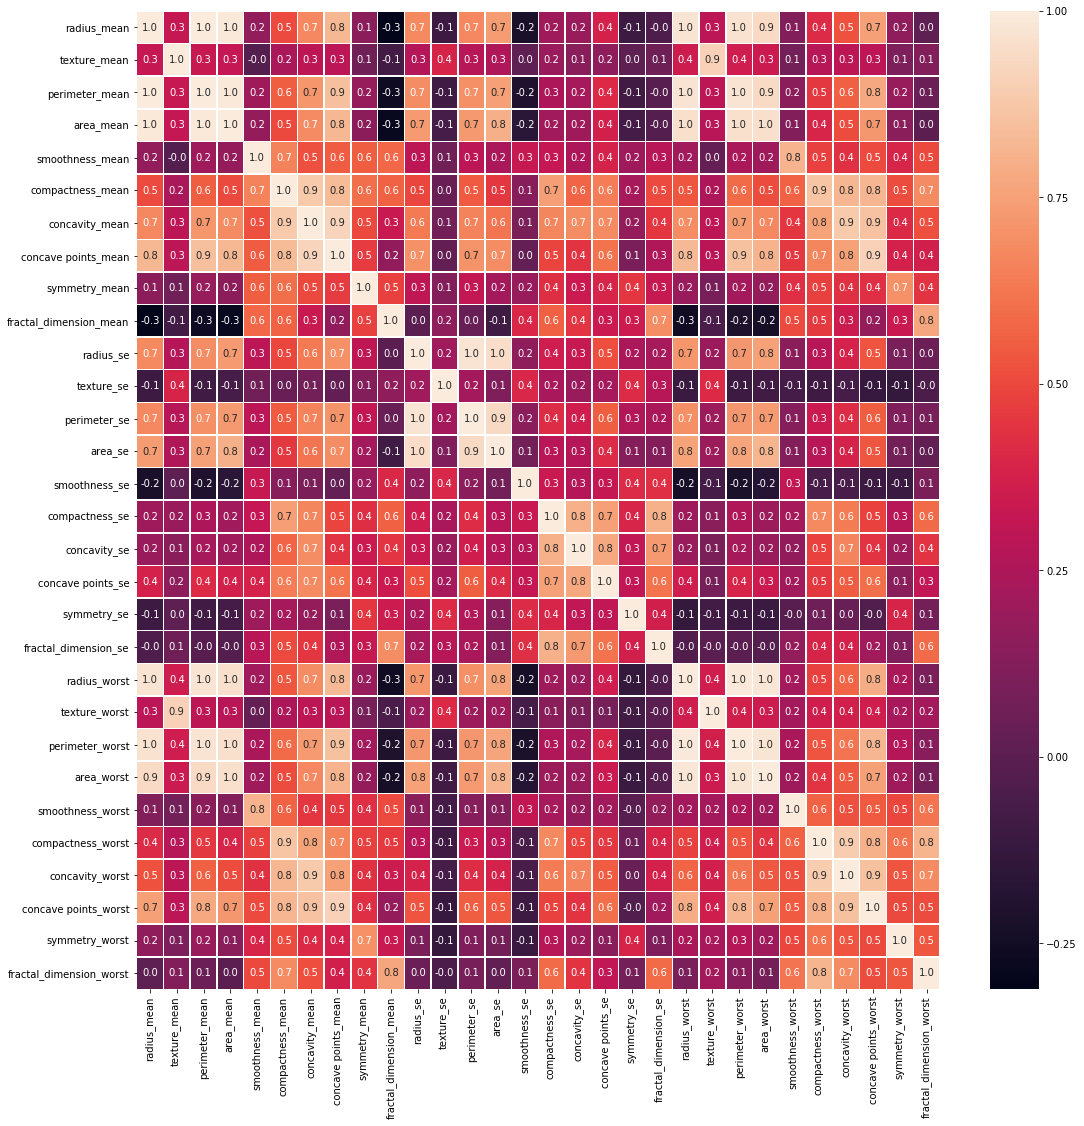

In [7]:
# heat map to look for correlation
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

In [8]:
# xxx_worst variables seem to correlate a lot so I might try removing these - concavity_worst is not too bad so I might leave this one in. Also, we don't need the diagnosis column in the x's
droplist = ['diagnosis','area_worst', 'concave points_worst', 'radius_worst', 'perimeter_worst']

### extract features and target vector

In [9]:
x_data = data.drop(droplist, axis=1)
x_data.shape

(569, 26)

In [10]:
#target vector
y_data = data['diagnosis']
y_data.shape

(569,)

#### PCA

In [190]:
from sklearn import decomposition

In [191]:
pca = decomposition.PCA(n_components=5)
pc = pca.fit_transform(x_data)

pc_df = pd.DataFrame(data = pc , 
        columns = ['PC1', 'PC2','PC3','PC4', 'PC5'])
pc_df['Cluster'] = y_data
pc_df.head()

,PC1,PC2,PC3,PC4,PC5,Cluster
0,357.179085,76.176739,-12.320315,-13.460014,3.375979,M
1,672.229342,-35.417872,-7.893415,6.646100,0.126217,M
2,552.062154,-3.331014,-2.525475,-0.635373,-1.430853,M
3,-269.055695,14.477742,3.511227,-4.714609,-0.551808,M
4,645.662144,-12.365506,-14.518583,0.369686,-0.729697,M


In [192]:
#investigate the variance
pca.explained_variance_ratio_

array([9.93623304e-01, 5.86598030e-03, 3.89301188e-04, 9.91687707e-05,
       1.67572846e-05])

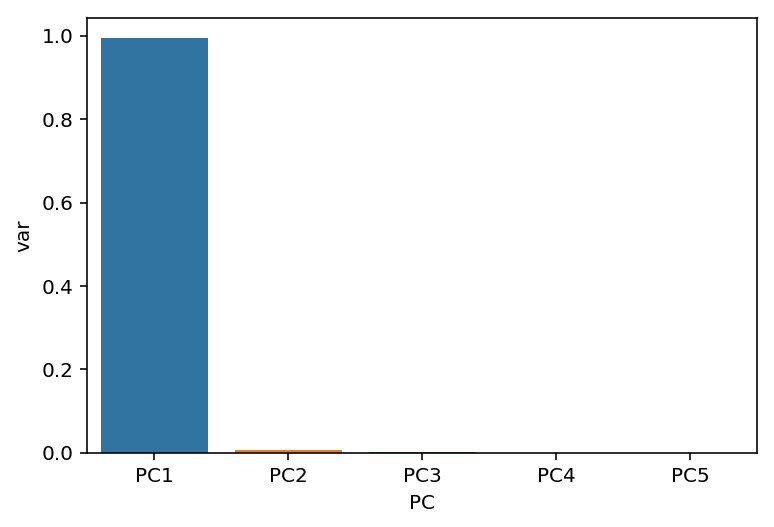

In [193]:
# plot the variance
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4', 'PC5']})
sns.barplot(x='PC',y="var", 
           data=df);

PC1 is responsible for most of the variance in the data.

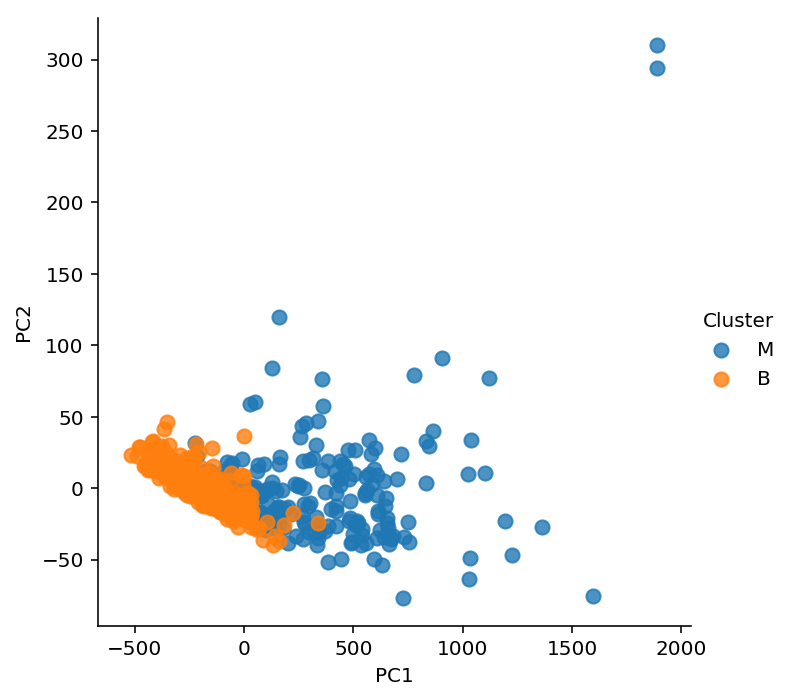

In [194]:
#plot the clusters
sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  hue='Cluster', # color by cluster
  legend=True,
  scatter_kws={"s": 50}); # specify the point size

The data appears to be fairly discretely clustered and therefore shouldn't be a problem for the classifiers.

### Prep machine learning training and test data

In [11]:
### simple Gaussian naive bayes
#simple Gaussian naive Bayes
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_data, y_data, test_size=0.3, random_state=8418)

In [12]:
# confusion matrix plotting function
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [13]:
# roc plot function

from sklearn.metrics import roc_curve, auc

def plot_roc_auc(actual, preds):
    fpr, tpr, thresholds = roc_curve(actual, preds[:,1])
    plt.plot(fpr, tpr,'r')
    plt.plot([0,1],[0,1],'b')
    plt.title('AUC: {}'.format(auc(fpr,tpr)))
    plt.show()

### First pass - A simple Naive Bayes classifier

Accuracy is:  0.9181286549707602


<IPython.core.display.Javascript object>


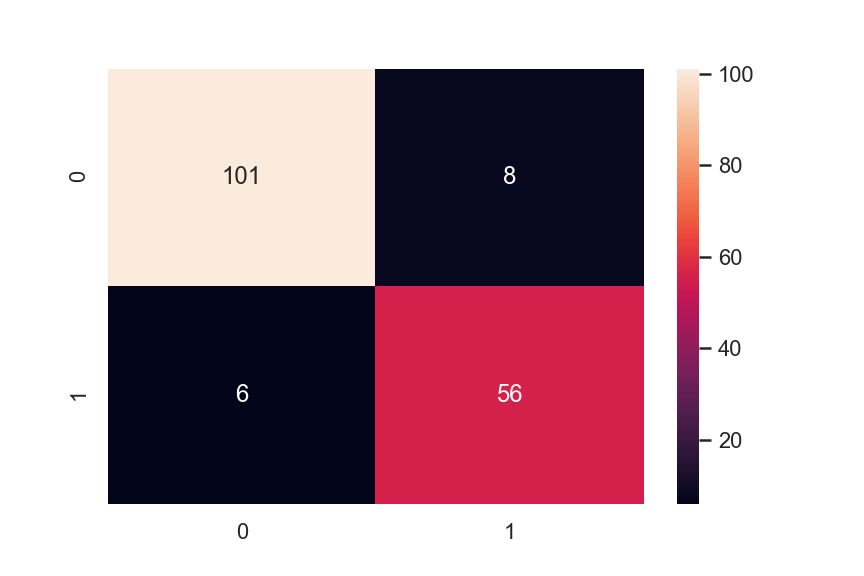

In [23]:
from sklearn.naive_bayes import GaussianNB #choose model class - done
model = GaussianNB() #instantiate the model - done (GaussianNB has no hyperparameters)
model.fit(xtrain, ytrain) #fit the model to the data
y_model = model.predict(xtest) #predict on new data
#finally, use the accuracy_score utility to see the fraction of predicted labels that match their true value:

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
ac = accuracy_score(ytest,model.predict(xtest))
print('Accuracy is: ',ac)
cm = confusion_matrix(ytest,model.predict(xtest))
sns.heatmap(cm,annot=True,fmt="d");

In [12]:
# 92 percent model accuracy with simple Gaussian naive bayes method.

### Try a support vector machine

In [13]:
from sklearn.svm import SVC
from sklearn.decomposition import RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

pca = PCA(n_components=25, random_state=8418, svd_solver='randomized')
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca,svc)

#### Hyper-Parameter optimization

In [14]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1,5,10,50],
             'svc__gamma': [0.00005, 0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

In [15]:
grid.fit(xtrain, ytrain)
print(grid.best_params_)

{'svc__C': 50, 'svc__gamma': 5e-05}


In [16]:
# best params: {'svc__C': 5, 'svc__gamma': 5e-05}
model = grid.best_estimator_
yfit = model.predict(xtest)

Accuracy is:  0.9181286549707602


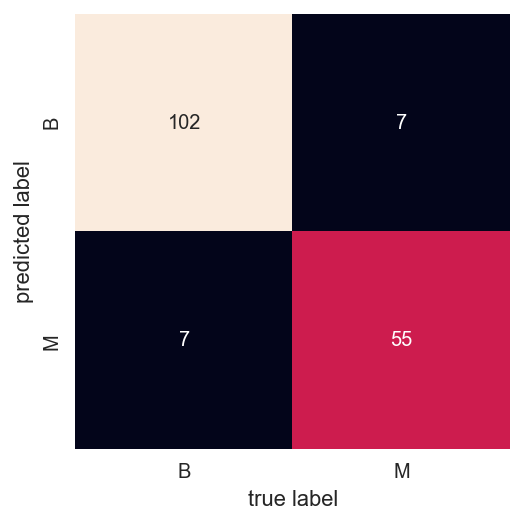

In [17]:
ac = accuracy_score(ytest,model.predict(xtest))
print('Accuracy is: ',ac)

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['B','M'],
            yticklabels=['B','M'])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [18]:
ytest.str.contains(r'B').sum(), ytest.str.contains(r'M').sum(), 

(109, 62)

The support vector machine is 92% accurate, even with optimized parameters. This offers no real improvement over the basic classifier.

#### Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
clf_rf = RandomForestClassifier(random_state=8418)      
clr_rf = clf_rf.fit(xtrain,ytrain)

Accuracy is:  0.9649122807017544


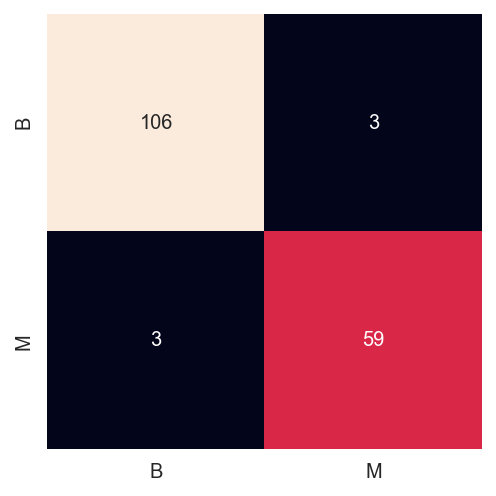

In [21]:
ac = accuracy_score(ytest,clf_rf.predict(xtest))
print('Accuracy is: ',ac)
cm = confusion_matrix(ytest,clf_rf.predict(xtest))
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['B','M'],
            yticklabels=['B','M'])

96% accuracy achieved with the random forest classifier. A slight improvement over naive bayes and svm.

#### Univariate feature selection using the SelectKBest Chi2 function

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find top 5 scoring features using chi2 clustering
select_feature = SelectKBest(chi2, k=5).fit(xtrain, ytrain)

In [23]:
clustering_results = pd.DataFrame()
clustering_results['score'] = select_feature.scores_
clustering_results['feature'] = xtrain.columns
clustering_results = clustering_results.sort_values(['score'], ascending=[False])
clustering_results.head(10)

,score,feature
3,38566.723964,area_mean
13,6664.799071,area_se
2,1414.105679,perimeter_mean
12,190.772043,perimeter_se
0,187.702712,radius_mean
20,134.620104,texture_worst
1,76.472966,texture_mean
23,28.004307,concavity_worst
10,26.775636,radius_se
6,14.182648,concavity_mean


Accuracy is:  0.9005847953216374


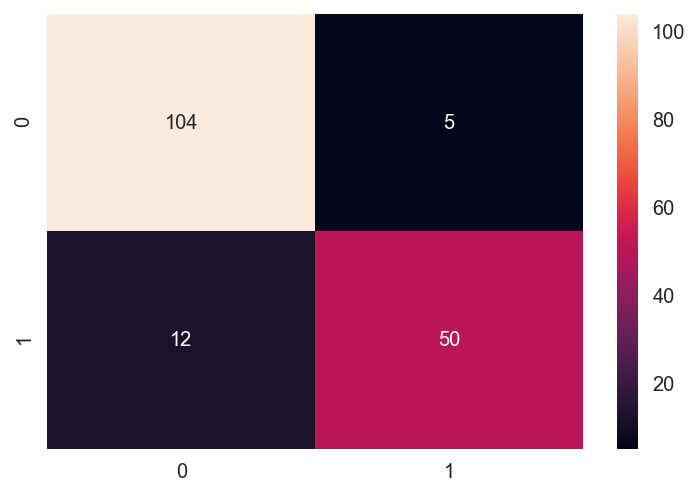

In [24]:
xtrain2 = select_feature.transform(xtrain)
xtest2 = select_feature.transform(xtest)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(xtrain2,ytrain)
ac_2 = accuracy_score(ytest,clf_rf_2.predict(xtest2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(ytest,clf_rf_2.predict(xtest2))
sns.heatmap(cm_2,annot=True,fmt="d")

This approach to feature selection has brought signifcantly worse performance!!

In [25]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(xtrain, ytrain)
print('Chosen best 5 feature by rfe:',xtrain.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['radius_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
       'area_se'],
      dtype='object')


A slightly different selection of variables from Chi2.  Retrying the random forest training:

Accuracy is:  0.9473684210526315


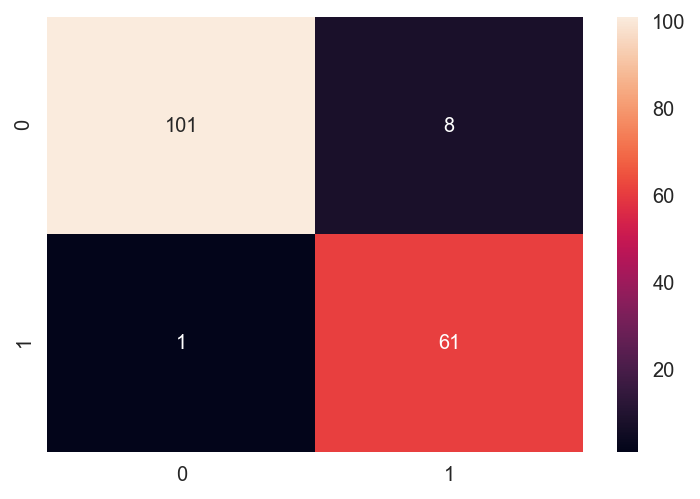

In [26]:
xtrain3 = rfe.transform(xtrain)
xtest3 = rfe.transform(xtest)
#random forest classifier with n_estimators=10 (default)
clf_rf_3 = RandomForestClassifier()      
clr_rf_3 = clf_rf_3.fit(xtrain3,ytrain)
ac_3 = accuracy_score(ytest,clf_rf_3.predict(xtest3))
print('Accuracy is: ',ac_3)
cm_3 = confusion_matrix(ytest,clf_rf_3.predict(xtest3))
sns.heatmap(cm_3,annot=True,fmt="d");

** bit better than before - 96% accuracy. But only marginally better than the full data set above.  This is the best score by the looks of it. **

### Recursive feature elimination with cross validation and random forest classification

In [27]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(xtrain, ytrain)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', xtrain.columns[rfecv.support_])

Optimal number of features : 22
Best features : Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'fractal_dimension_se', 'texture_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'symmetry_worst'],
      dtype='object')


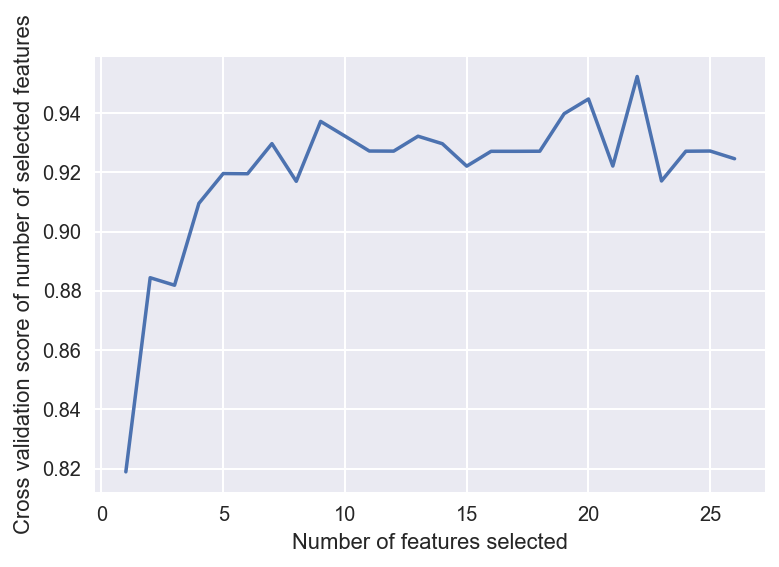

In [28]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [29]:
# levels out at about 9 features

Accuracy is:  0.9649122807017544


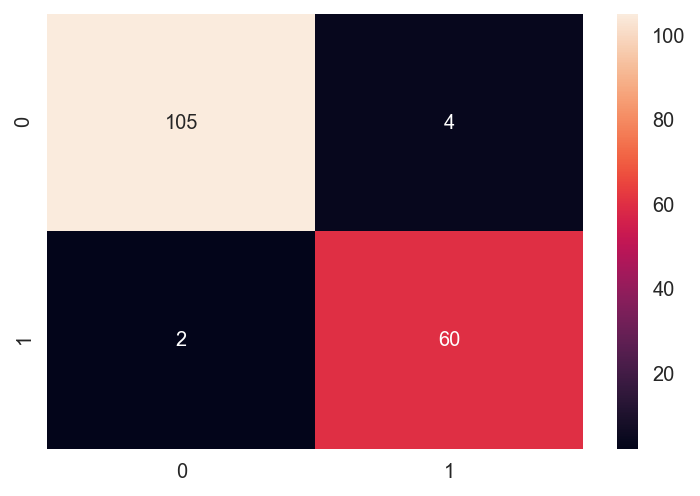

In [30]:
xtrain4 = rfecv.transform(xtrain)
xtest4 = rfecv.transform(xtest)
#random forest classifier with n_estimators=10 (default)
clf_rf_4 = RandomForestClassifier()      
clr_rf_4 = clf_rf_4.fit(xtrain4,ytrain)
ac_4 = accuracy_score(ytest,clf_rf_4.predict(xtest4))
print('Accuracy is: ',ac_4)
cm_4 = confusion_matrix(ytest,clf_rf_4.predict(xtest4))
sns.heatmap(cm_4,annot=True,fmt="d");

**about the same again. Flogging a dead horse at this point. The RFE model above is probably as good as it gets for this data set at 96% accuracy.**

### _Addendum_

#### Principle component analysis (PCA)
* PCA for feature extraction 1st requires normalizing the data:

Text(0,0.5,'explained_variance_ratio_')

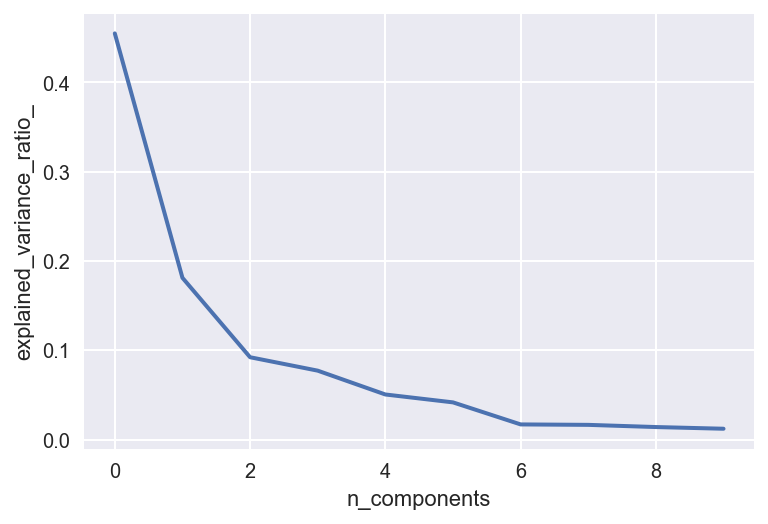

In [31]:
# split data train 70 % and test 30 %
xtrain, xtest, ytrain, ytest = train_test_split(x_data, y_data, test_size=0.3, random_state=42) #70/30 train/test split
#normalization
xtrain_norm = (xtrain-xtrain.mean())/(xtrain.max()-xtrain.min())
xtest_norm = (xtest-xtest.mean())/(xtest.max()-xtest.min())

from sklearn.decomposition import PCA
#pca = PCA()
pca = PCA(n_components=10) # set number of components to plot table below
pca.fit(xtrain_norm)

plt.figure()
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [32]:
# According to variance ratio, 6 component can be chosen.

In [33]:
#Dump components relations with features:
#https://stackoverflow.com/questions/22984335/recovering-features-names-of-explained-variance-ratio-in-pca-with-sklearn
pd.DataFrame(pca.components_,columns=xtrain_norm.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10'])

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
PC-1,0.226917,0.102605,0.241003,0.202754,0.159217,0.320617,0.343458,0.341122,0.168053,0.108114,...,0.090656,0.153348,0.062756,0.079502,0.122862,0.182433,0.271850,0.386950,0.124450,0.173339
PC-2,-0.389761,-0.090688,-0.370462,-0.342233,0.169137,0.127348,-0.030175,-0.154678,0.154252,0.401887,...,0.062840,0.043262,0.132716,0.149618,-0.069794,0.223435,0.142046,0.067141,0.107934,0.303938
PC-3,-0.052628,0.272026,-0.049133,-0.019220,-0.077797,-0.023167,0.024219,-0.031899,0.069910,0.035422,...,0.102889,0.188843,0.369464,0.141511,0.216905,-0.252874,-0.166528,-0.189174,-0.116413,-0.150163
PC-4,0.055726,-0.488860,0.060420,0.076616,0.080314,0.066360,0.090417,0.100889,0.084601,0.089848,...,0.072423,0.157833,0.250558,0.108934,-0.647486,-0.145218,-0.159325,-0.139063,-0.087029,-0.107338
PC-5,-0.031397,-0.000515,-0.026068,-0.055976,-0.456305,0.025532,0.093838,-0.141213,-0.208952,-0.019042,...,0.198928,0.152185,-0.101582,0.188919,-0.062898,-0.506761,0.195423,0.298285,-0.116123,0.117067
PC-6,0.033429,-0.019724,0.025635,-0.007475,-0.161026,-0.036239,-0.087170,-0.051141,0.416757,-0.158809,...,-0.073095,-0.127224,0.515861,-0.117997,0.016009,-0.208969,0.107645,0.022670,0.561702,-0.032960
PC-7,-0.000555,0.132589,-0.002611,0.086659,-0.121989,-0.044968,-0.166856,-0.171156,-0.480795,0.055316,...,-0.107282,-0.212871,0.382779,0.008962,0.030441,0.157871,0.199829,-0.064250,0.061158,0.213526
PC-8,0.017309,-0.017574,0.003542,-0.029565,-0.032124,-0.167810,0.115016,0.051452,-0.229656,-0.358367,...,0.141826,0.179214,0.273801,-0.060642,-0.020057,0.299101,-0.055746,0.261775,0.060668,-0.281020
PC-9,-0.014180,0.433946,-0.009705,-0.035944,-0.006770,0.123200,-0.106530,0.018743,0.345279,0.013164,...,0.021982,0.302287,-0.131696,0.055671,0.053927,-0.025733,-0.059055,-0.303157,-0.019371,-0.138331
PC-10,-0.208198,-0.052501,-0.214598,-0.088278,-0.171319,-0.362567,0.148880,-0.160172,0.283368,-0.169253,...,0.199368,0.055397,-0.194487,0.015995,0.018845,0.154572,-0.147910,0.364417,0.095647,-0.050127


### Tensorflow

In [21]:
#import tensorflow as tf
from sklearn import metrics
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.externals import joblib #for saving the trained model

In [ ]:
ytrain.replace(('M', 'B'), (1, 0), inplace=True)
ytest.replace(('M', 'B'), (1, 0), inplace=True) 

In [33]:
# https://towardsdatascience.com/from-scikit-learn-to-tensorflow-part-1-9ee0b96d4c85

# ------------------------------------------
# TensorFlow Implementation
# ------------------------------------------


# Extract the features from the training data
feats = tf.contrib.learn.infer_real_valued_columns_from_input(xtrain)

# Building a 2-layer hidden layer DNN comprising 20 units in each layer
classifier_tf = tf.contrib.learn.DNNClassifier(
    feature_columns=feats, hidden_units=[20,20,20], n_classes=2)

# Use the train data to train this classifier
classifier_tf.fit(
    xtrain,
    ytrain,
    steps=4000,
    batch_size=100)

# Use the trained model to predict on the test data
predictions = list(classifier_tf.predict(xtest, as_iterable=True))
score = metrics.accuracy_score(ytest, predictions)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x123573d68>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/var/folders/g8/kssh14_n04b8111tck8b_6qr0000gn/T/tmpbq3doh4r'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/g8/kssh14_

In [34]:
score

0.9181286549707602

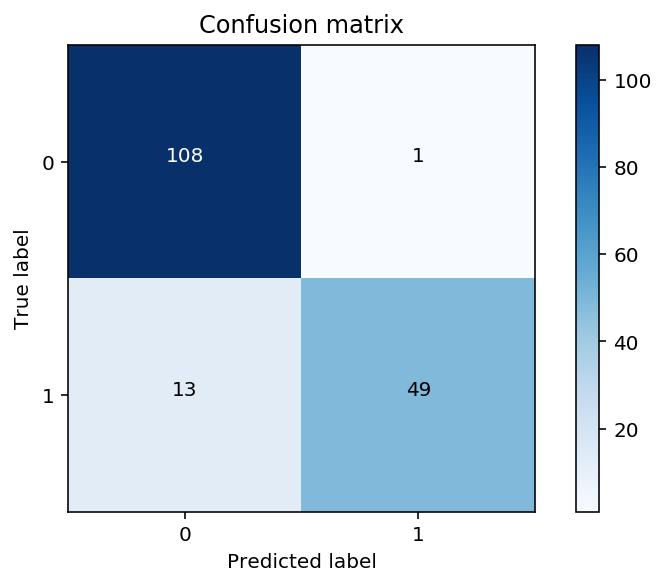

In [35]:
dat = confusion_matrix(ytest, predictions)

plot_confusion_matrix(
    dat, classes=[0,1], title='Confusion matrix')
plt.show()

### xgboost

In [14]:
import xgboost as xgb

In [20]:
# uncomment below if the data hasn't been vectorized already for TensorFlow:

#ytrain.replace(('M', 'B'), (1, 0), inplace=True)
#ytest.replace(('M', 'B'), (1, 0), inplace=True) 

In [23]:
reg = xgb.XGBRegressor(
    n_estimators=1000,
    max_depth=12,
    learning_rate=0.1,
    subsample=1,
    colsample_bytree=0.9,
    random_state=8418,
    eval_metric='rmse',
    early_stopping_rounds=30,
    n_jobs=4)

In [24]:
reg.fit(xtrain, ytrain)

y_pred = reg.predict(xtest)

In [25]:
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(ytest, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.08%


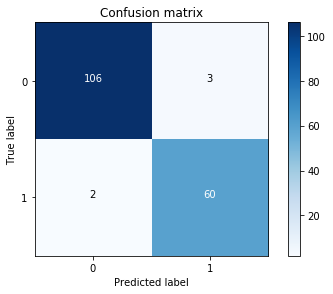

In [26]:
dat = confusion_matrix(ytest, predictions)

plot_confusion_matrix(
    dat, classes=[0,1], title='Confusion matrix')
plt.show()

XGBoost provides better accuracy than random forest and training time is almost instant making xgboost the most efficient solution.

In [27]:
from sklearn.externals import joblib
#joblib.dump(reg, 'xgb_best_model.pkl')

['xgb_best_model.pkl']

### Improving xgboost with parfit hyper parameter tuning

In [15]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, f1_score, mean_squared_error, matthews_corrcoef
import parfit as pf

from parfit import bestFit # Necessary if you wish to use bestFit

# Necessary if you wish to run each step sequentially
from parfit.fit import *
from parfit.score import *
from parfit.plot import *
from parfit.crossval import *

In [16]:
# hyper parameter tuning with parfit instead of gridsearch

# reg = xgb.XGBRegressor(n_estimators=1000, max_depth=12, learning_rate=0.1, subsample=1, colsample_bytree=0.9, random_state=8418, eval_metric='rmse',n_jobs=4)

grid = {
    'n_estimators': [100, 1000, 10000],
    'max_depth': [6,12,24], 
    'learning_rate': [0.001,0.01,0.1,1.0],  # logistic regression,
    'subsample': [0.1,0.5,0.8,1.0],
    'colsample_bytree': [0.1,0.5,0.8,1.0],
    'random_state': [8418],
    'n_jobs': [-1]
}
paramGrid = ParameterGrid(grid)

In [61]:
best_model, best_score, all_models, all_scores = pf.bestFit(
    XGBRegressor(),
    paramGrid,
    xtrain,
    ytrain,
    nfolds=10, #10-fold cross validation, can also be substituted with xval, yval datasets.
    
    metric=mean_squared_error, #roc_auc_score, 
    
    greater_is_better=False, #True
    
    scoreLabel='loss') #AUC
    
print(best_model, best_score)

-------------CROSS-VALIDATING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   43.5s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:   49.8s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   58.1s
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:  

Too many dimensions to plot.
{'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 12, 'n_estimators': 10000, 'n_jobs': -1, 'random_state': 8418, 'subsample': 0.5} 0.0018576021686771281


[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed:  9.2min finished


In [66]:
reg = xgb.XGBRegressor(
    n_estimators=best_model['n_estimators'],
    max_depth=best_model['max_depth'],
    learning_rate=best_model['learning_rate'],
    subsample=best_model['subsample'],
    colsample_bytree=best_model['colsample_bytree'],
    random_state=8418,
    eval_metric='rmse',
    early_stopping_rounds=30,
    n_jobs=-1)

In [67]:
reg.fit(xtrain, ytrain)

y_pred = reg.predict(xtest)

In [68]:
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(ytest, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.66%


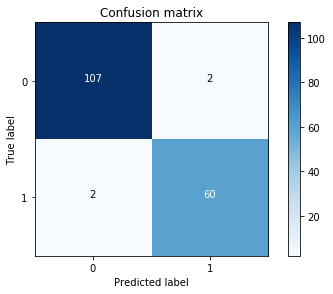

In [69]:
dat = confusion_matrix(ytest, predictions)

plot_confusion_matrix(
    dat, classes=[0,1], title='Confusion matrix')
plt.show()

In [70]:
#from sklearn.externals import joblib
#joblib.dump(reg, 'xgb_best_model.pkl')

['xgb_best_model.pkl']

In [200]:
#reg = joblib.load('xgb_best_model.pkl')

### xgboost hyper parameter tuning with hyperopt

In [17]:
# https://www.dataiku.com/learn/guide/code/python/advanced-xgboost-tuning.html
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

In [35]:
def objective(space):

    clf = XGBRegressor(
        n_estimators=10000,
        max_depth=12,#space['max_depth'],
        min_child_weight=space['min_child_weight'],
        subsample=space['subsample'])

    eval_set = [(xtrain, ytrain), (xtest, ytest)]

    clf.fit(
        xtrain,
        ytrain,
        eval_set=eval_set,
        eval_metric="auc",
        early_stopping_rounds=30)

    pred = clf.predict(xtest)
    auc = roc_auc_score(ytest, pred)
    print("SCORE:", auc)

    return {'loss': 1 - auc, 'status': STATUS_OK}

space ={
        'n_estimators': hp.quniform('n_estimators', 100, 10000, 100),
        'max_depth': hp.quniform('max_depth', 5, 30, 1),
        'min_child_weight': hp.quniform ('min_child', 1, 10, 1),
        'subsample': hp.uniform ('subsample', 0.1, 1),
        'learning_rate':hp.uniform('learning_rate',0.001, 1),
        'colsample_bytree':hp.quniform('colsample_bytree',0.1, 1, 0.2)
    }


trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

print(best)

[0]	validation_0-auc:0.969503	validation_1-auc:0.958346
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.987473	validation_1-auc:0.982465
[2]	validation_0-auc:0.991465	validation_1-auc:0.982687
[3]	validation_0-auc:0.992097	validation_1-auc:0.993341
[4]	validation_0-auc:0.993374	validation_1-auc:0.993711
[5]	validation_0-auc:0.995134	validation_1-auc:0.995339
[6]	validation_0-auc:0.995054	validation_1-auc:0.994303
[7]	validation_0-auc:0.995578	validation_1-auc:0.993637
[8]	validation_0-auc:0.996855	validation_1-auc:0.993933
[9]	validation_0-auc:0.997312	validation_1-auc:0.993785
[10]	validation_0-auc:0.997849	validation_1-auc:0.992897
[11]	validation_0-auc:0.998038	validation_1-auc:0.992157
[12]	validation_0-auc:0.998495	validation_1-auc:0.993933
[13]	validation_0-auc:0.99836	validation_1-auc:0.994081
[14]	validation_0-auc:0.998522	validation_1-auc:0.993341

[71]	validation_0-auc:0.997446	validation_1-auc:0.996153
[72]	validation_0-auc:0.997608	validation_1-auc:0.996005
[73]	validation_0-auc:0.997688	validation_1-auc:0.996449
[74]	validation_0-auc:0.997661	validation_1-auc:0.996597
[75]	validation_0-auc:0.997796	validation_1-auc:0.996745
[76]	validation_0-auc:0.997876	validation_1-auc:0.996301
[77]	validation_0-auc:0.997715	validation_1-auc:0.996449
[78]	validation_0-auc:0.99793	validation_1-auc:0.996597
[79]	validation_0-auc:0.997957	validation_1-auc:0.996597
[80]	validation_0-auc:0.998172	validation_1-auc:0.996301
[81]	validation_0-auc:0.998118	validation_1-auc:0.996153
[82]	validation_0-auc:0.998253	validation_1-auc:0.996449
[83]	validation_0-auc:0.998253	validation_1-auc:0.996597
[84]	validation_0-auc:0.998172	validation_1-auc:0.996597
[85]	validation_0-auc:0.998306	validation_1-auc:0.996893
[86]	validation_0-auc:0.998253	validation_1-auc:0.996745
[87]	validation_0-auc:0.99828	validation_1-auc:0.996745
[88]	validation_0-auc:0.99828	val

[40]	validation_0-auc:1	validation_1-auc:0.996301
[41]	validation_0-auc:1	validation_1-auc:0.996301
[42]	validation_0-auc:1	validation_1-auc:0.996301
[43]	validation_0-auc:1	validation_1-auc:0.996153
[44]	validation_0-auc:1	validation_1-auc:0.996153
[45]	validation_0-auc:1	validation_1-auc:0.996745
[46]	validation_0-auc:1	validation_1-auc:0.996597
[47]	validation_0-auc:1	validation_1-auc:0.996597
[48]	validation_0-auc:1	validation_1-auc:0.996449
[49]	validation_0-auc:1	validation_1-auc:0.996597
[50]	validation_0-auc:1	validation_1-auc:0.996597
[51]	validation_0-auc:1	validation_1-auc:0.996745
[52]	validation_0-auc:1	validation_1-auc:0.996745
[53]	validation_0-auc:1	validation_1-auc:0.996597
[54]	validation_0-auc:1	validation_1-auc:0.996745
Stopping. Best iteration:
[24]	validation_0-auc:0.999677	validation_1-auc:0.997189

SCORE: 0.9967445989937852
[0]	validation_0-auc:0.96918	validation_1-auc:0.958346
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early sto

[2]	validation_0-auc:0.98172	validation_1-auc:0.971367
[3]	validation_0-auc:0.986102	validation_1-auc:0.982687
[4]	validation_0-auc:0.986653	validation_1-auc:0.986165
[5]	validation_0-auc:0.987876	validation_1-auc:0.987052
[6]	validation_0-auc:0.990108	validation_1-auc:0.98979
[7]	validation_0-auc:0.990551	validation_1-auc:0.991862
[8]	validation_0-auc:0.992298	validation_1-auc:0.992453
[9]	validation_0-auc:0.993817	validation_1-auc:0.992453
[10]	validation_0-auc:0.993817	validation_1-auc:0.992157
[11]	validation_0-auc:0.994019	validation_1-auc:0.992009
[12]	validation_0-auc:0.993777	validation_1-auc:0.991714
[13]	validation_0-auc:0.993723	validation_1-auc:0.992305
[14]	validation_0-auc:0.993965	validation_1-auc:0.993045
[15]	validation_0-auc:0.994677	validation_1-auc:0.992305
[16]	validation_0-auc:0.995833	validation_1-auc:0.993045
[17]	validation_0-auc:0.99578	validation_1-auc:0.992601
[18]	validation_0-auc:0.995806	validation_1-auc:0.992897
[19]	validation_0-auc:0.996075	validation_

[39]	validation_0-auc:1	validation_1-auc:0.996893
[40]	validation_0-auc:1	validation_1-auc:0.996893
[41]	validation_0-auc:1	validation_1-auc:0.996745
[42]	validation_0-auc:1	validation_1-auc:0.996893
[43]	validation_0-auc:1	validation_1-auc:0.997041
[44]	validation_0-auc:1	validation_1-auc:0.996745
[45]	validation_0-auc:1	validation_1-auc:0.996893
[46]	validation_0-auc:1	validation_1-auc:0.996745
[47]	validation_0-auc:1	validation_1-auc:0.996745
[48]	validation_0-auc:1	validation_1-auc:0.996745
[49]	validation_0-auc:1	validation_1-auc:0.996745
[50]	validation_0-auc:1	validation_1-auc:0.996745
[51]	validation_0-auc:1	validation_1-auc:0.996745
[52]	validation_0-auc:1	validation_1-auc:0.996745
[53]	validation_0-auc:1	validation_1-auc:0.996893
[54]	validation_0-auc:1	validation_1-auc:0.996893
[55]	validation_0-auc:1	validation_1-auc:0.996893
[56]	validation_0-auc:1	validation_1-auc:0.996893
[57]	validation_0-auc:1	validation_1-auc:0.996745
[58]	validation_0-auc:1	validation_1-auc:0.996893


[3]	validation_0-auc:0.99875	validation_1-auc:0.99741
[4]	validation_0-auc:0.999382	validation_1-auc:0.998224
[5]	validation_0-auc:0.999422	validation_1-auc:0.997484
[6]	validation_0-auc:0.999462	validation_1-auc:0.998964
[7]	validation_0-auc:0.999758	validation_1-auc:0.99852
[8]	validation_0-auc:0.999946	validation_1-auc:0.997484
[9]	validation_0-auc:0.999919	validation_1-auc:0.997928
[10]	validation_0-auc:1	validation_1-auc:0.997632
[11]	validation_0-auc:0.999973	validation_1-auc:0.997189
[12]	validation_0-auc:0.999946	validation_1-auc:0.997337
[13]	validation_0-auc:1	validation_1-auc:0.997484
[14]	validation_0-auc:1	validation_1-auc:0.99778
[15]	validation_0-auc:1	validation_1-auc:0.998224
[16]	validation_0-auc:1	validation_1-auc:0.998224
[17]	validation_0-auc:1	validation_1-auc:0.99778
[18]	validation_0-auc:1	validation_1-auc:0.997928
[19]	validation_0-auc:1	validation_1-auc:0.99778
[20]	validation_0-auc:1	validation_1-auc:0.99778
[21]	validation_0-auc:1	validation_1-auc:0.998076
[

[56]	validation_0-auc:1	validation_1-auc:0.997632
[57]	validation_0-auc:1	validation_1-auc:0.997632
[58]	validation_0-auc:1	validation_1-auc:0.997632
[59]	validation_0-auc:1	validation_1-auc:0.997484
[60]	validation_0-auc:1	validation_1-auc:0.997484
[61]	validation_0-auc:1	validation_1-auc:0.997484
[62]	validation_0-auc:1	validation_1-auc:0.997484
[63]	validation_0-auc:1	validation_1-auc:0.997484
[64]	validation_0-auc:1	validation_1-auc:0.997632
[65]	validation_0-auc:1	validation_1-auc:0.99778
[66]	validation_0-auc:1	validation_1-auc:0.99778
[67]	validation_0-auc:1	validation_1-auc:0.997484
[68]	validation_0-auc:1	validation_1-auc:0.997632
[69]	validation_0-auc:1	validation_1-auc:0.99778
[70]	validation_0-auc:1	validation_1-auc:0.997632
[71]	validation_0-auc:1	validation_1-auc:0.99778
[72]	validation_0-auc:1	validation_1-auc:0.99778
[73]	validation_0-auc:1	validation_1-auc:0.99778
[74]	validation_0-auc:1	validation_1-auc:0.99778
[75]	validation_0-auc:1	validation_1-auc:0.99778
[76]	val

[105]	validation_0-auc:0.999651	validation_1-auc:0.996893
[106]	validation_0-auc:0.999651	validation_1-auc:0.996893
[107]	validation_0-auc:0.999677	validation_1-auc:0.997041
[108]	validation_0-auc:0.999704	validation_1-auc:0.996893
[109]	validation_0-auc:0.999704	validation_1-auc:0.996893
[110]	validation_0-auc:0.999704	validation_1-auc:0.997041
[111]	validation_0-auc:0.999704	validation_1-auc:0.996893
[112]	validation_0-auc:0.999704	validation_1-auc:0.996745
[113]	validation_0-auc:0.999704	validation_1-auc:0.996745
[114]	validation_0-auc:0.999731	validation_1-auc:0.996597
[115]	validation_0-auc:0.999704	validation_1-auc:0.996745
[116]	validation_0-auc:0.999731	validation_1-auc:0.997041
[117]	validation_0-auc:0.999758	validation_1-auc:0.996893
[118]	validation_0-auc:0.999731	validation_1-auc:0.997041
[119]	validation_0-auc:0.999731	validation_1-auc:0.997041
[120]	validation_0-auc:0.999731	validation_1-auc:0.996301
[121]	validation_0-auc:0.999758	validation_1-auc:0.996153
[122]	validati

[64]	validation_0-auc:1	validation_1-auc:0.997484
[65]	validation_0-auc:1	validation_1-auc:0.997484
[66]	validation_0-auc:1	validation_1-auc:0.997484
[67]	validation_0-auc:1	validation_1-auc:0.997484
[68]	validation_0-auc:1	validation_1-auc:0.997484
[69]	validation_0-auc:1	validation_1-auc:0.997484
[70]	validation_0-auc:1	validation_1-auc:0.997484
Stopping. Best iteration:
[40]	validation_0-auc:1	validation_1-auc:0.99778

SCORE: 0.997484462858834
[0]	validation_0-auc:0.96	validation_1-auc:0.95546
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.988763	validation_1-auc:0.985129
[2]	validation_0-auc:0.990927	validation_1-auc:0.986386
[3]	validation_0-auc:0.993911	validation_1-auc:0.990678
[4]	validation_0-auc:0.994758	validation_1-auc:0.989864
[5]	validation_0-auc:0.996102	validation_1-auc:0.990456
[6]	validation_0-auc:0.995941	validation_1-auc:0.989864
[7]	v

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.976573	validation_1-auc:0.967224
[2]	validation_0-auc:0.982245	validation_1-auc:0.970331
[3]	validation_0-auc:0.98668	validation_1-auc:0.981355
[4]	validation_0-auc:0.986223	validation_1-auc:0.985499
[5]	validation_0-auc:0.989987	validation_1-auc:0.987422
[6]	validation_0-auc:0.992352	validation_1-auc:0.989346
[7]	validation_0-auc:0.993024	validation_1-auc:0.992157
[8]	validation_0-auc:0.993656	validation_1-auc:0.993637
[9]	validation_0-auc:0.994677	validation_1-auc:0.993489
[10]	validation_0-auc:0.995	validation_1-auc:0.993045
[11]	validation_0-auc:0.995269	validation_1-auc:0.993193
[12]	validation_0-auc:0.995269	validation_1-auc:0.993193
[13]	validation_0-auc:0.995349	validation_1-auc:0.993637
[14]	validation_0-auc:0.995161	validation_1-auc:0.993785
[15]	validation_0-auc:0.995645	validation_1-auc:0.992157
[16]	validation_0-auc:0.99629	validation_1-auc:0.992897
[17]	validation_0-auc:0.996263	validat

[35]	validation_0-auc:1	validation_1-auc:0.996449
[36]	validation_0-auc:1	validation_1-auc:0.996745
[37]	validation_0-auc:1	validation_1-auc:0.996745
[38]	validation_0-auc:1	validation_1-auc:0.996745
[39]	validation_0-auc:1	validation_1-auc:0.996745
[40]	validation_0-auc:1	validation_1-auc:0.996745
[41]	validation_0-auc:1	validation_1-auc:0.996745
[42]	validation_0-auc:1	validation_1-auc:0.996745
[43]	validation_0-auc:1	validation_1-auc:0.996745
[44]	validation_0-auc:1	validation_1-auc:0.996745
[45]	validation_0-auc:1	validation_1-auc:0.996745
[46]	validation_0-auc:1	validation_1-auc:0.996745
[47]	validation_0-auc:1	validation_1-auc:0.996745
[48]	validation_0-auc:1	validation_1-auc:0.996745
[49]	validation_0-auc:1	validation_1-auc:0.996745
[50]	validation_0-auc:1	validation_1-auc:0.996893
[51]	validation_0-auc:1	validation_1-auc:0.997041
[52]	validation_0-auc:1	validation_1-auc:0.997041
[53]	validation_0-auc:1	validation_1-auc:0.997041
[54]	validation_0-auc:1	validation_1-auc:0.997189


[50]	validation_0-auc:0.999785	validation_1-auc:0.998076
[51]	validation_0-auc:0.999812	validation_1-auc:0.998076
[52]	validation_0-auc:0.999866	validation_1-auc:0.997928
[53]	validation_0-auc:0.999866	validation_1-auc:0.997928
[54]	validation_0-auc:0.999866	validation_1-auc:0.997928
[55]	validation_0-auc:0.999892	validation_1-auc:0.997928
[56]	validation_0-auc:0.999866	validation_1-auc:0.997928
[57]	validation_0-auc:0.999866	validation_1-auc:0.997928
[58]	validation_0-auc:0.999892	validation_1-auc:0.997928
[59]	validation_0-auc:0.999892	validation_1-auc:0.997928
[60]	validation_0-auc:0.999892	validation_1-auc:0.997928
[61]	validation_0-auc:0.999892	validation_1-auc:0.997928
[62]	validation_0-auc:0.999892	validation_1-auc:0.997928
[63]	validation_0-auc:0.999892	validation_1-auc:0.997928
[64]	validation_0-auc:0.999892	validation_1-auc:0.997928
[65]	validation_0-auc:0.999892	validation_1-auc:0.99778
[66]	validation_0-auc:0.999892	validation_1-auc:0.99778
[67]	validation_0-auc:0.999892	va

[13]	validation_0-auc:0.999677	validation_1-auc:0.996301
[14]	validation_0-auc:0.999731	validation_1-auc:0.996893
[15]	validation_0-auc:0.999785	validation_1-auc:0.997484
[16]	validation_0-auc:0.999839	validation_1-auc:0.997337
[17]	validation_0-auc:0.999892	validation_1-auc:0.997189
[18]	validation_0-auc:0.999919	validation_1-auc:0.997041
[19]	validation_0-auc:0.999919	validation_1-auc:0.997484
[20]	validation_0-auc:0.999919	validation_1-auc:0.997484
[21]	validation_0-auc:0.999973	validation_1-auc:0.997337
[22]	validation_0-auc:0.999919	validation_1-auc:0.997632
[23]	validation_0-auc:0.999919	validation_1-auc:0.997337
[24]	validation_0-auc:0.999973	validation_1-auc:0.997484
[25]	validation_0-auc:0.999973	validation_1-auc:0.99778
[26]	validation_0-auc:0.999973	validation_1-auc:0.997928
[27]	validation_0-auc:0.999973	validation_1-auc:0.997928
[28]	validation_0-auc:0.999973	validation_1-auc:0.998076
[29]	validation_0-auc:0.999973	validation_1-auc:0.998224
[30]	validation_0-auc:1	validati

[89]	validation_0-auc:1	validation_1-auc:0.996005
[90]	validation_0-auc:1	validation_1-auc:0.996005
[91]	validation_0-auc:1	validation_1-auc:0.996153
Stopping. Best iteration:
[61]	validation_0-auc:1	validation_1-auc:0.996597

SCORE: 0.996152707901746
[0]	validation_0-auc:0.968159	validation_1-auc:0.945102
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.991626	validation_1-auc:0.984759
[2]	validation_0-auc:0.996411	validation_1-auc:0.981133
[3]	validation_0-auc:0.997527	validation_1-auc:0.991196
[4]	validation_0-auc:0.997984	validation_1-auc:0.991492
[5]	validation_0-auc:0.998898	validation_1-auc:0.991787
[6]	validation_0-auc:0.999167	validation_1-auc:0.991714
[7]	validation_0-auc:0.999543	validation_1-auc:0.993785
[8]	validation_0-auc:0.999247	validation_1-auc:0.993341
[9]	validation_0-auc:0.999328	validation_1-auc:0.992601
[10]	validation_0-auc:0.999462	

[15]	validation_0-auc:0.999516	validation_1-auc:0.997189
[16]	validation_0-auc:0.999624	validation_1-auc:0.997928
[17]	validation_0-auc:0.999704	validation_1-auc:0.997484
[18]	validation_0-auc:0.999677	validation_1-auc:0.997632
[19]	validation_0-auc:0.999731	validation_1-auc:0.997928
[20]	validation_0-auc:0.999785	validation_1-auc:0.997632
[21]	validation_0-auc:0.999812	validation_1-auc:0.99778
[22]	validation_0-auc:0.999812	validation_1-auc:0.997632
[23]	validation_0-auc:0.999812	validation_1-auc:0.997928
[24]	validation_0-auc:0.999866	validation_1-auc:0.998224
[25]	validation_0-auc:0.999892	validation_1-auc:0.998372
[26]	validation_0-auc:0.999892	validation_1-auc:0.998076
[27]	validation_0-auc:0.999892	validation_1-auc:0.998224
[28]	validation_0-auc:0.999919	validation_1-auc:0.998076
[29]	validation_0-auc:0.999919	validation_1-auc:0.998372
[30]	validation_0-auc:0.999973	validation_1-auc:0.998224
[31]	validation_0-auc:1	validation_1-auc:0.998372
[32]	validation_0-auc:0.999946	validati

[94]	validation_0-auc:1	validation_1-auc:0.997189
[95]	validation_0-auc:1	validation_1-auc:0.997189
[96]	validation_0-auc:1	validation_1-auc:0.997337
[97]	validation_0-auc:1	validation_1-auc:0.997189
Stopping. Best iteration:
[67]	validation_0-auc:1	validation_1-auc:0.997632

SCORE: 0.9971885173128144
[0]	validation_0-auc:0.96	validation_1-auc:0.95546
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.986882	validation_1-auc:0.985425
[2]	validation_0-auc:0.992997	validation_1-auc:0.987274
[3]	validation_0-auc:0.994099	validation_1-auc:0.993341
[4]	validation_0-auc:0.995228	validation_1-auc:0.991787
[5]	validation_0-auc:0.995618	validation_1-auc:0.991492
[6]	validation_0-auc:0.995753	validation_1-auc:0.99164
[7]	validation_0-auc:0.995901	validation_1-auc:0.993859
[8]	validation_0-auc:0.996613	validation_1-auc:0.993933
[9]	validation_0-auc:0.996909	validation_1

[10]	validation_0-auc:0.997446	validation_1-auc:0.994673
[11]	validation_0-auc:0.998065	validation_1-auc:0.994525
[12]	validation_0-auc:0.998306	validation_1-auc:0.994525
[13]	validation_0-auc:0.998387	validation_1-auc:0.994525
[14]	validation_0-auc:0.998683	validation_1-auc:0.995117
[15]	validation_0-auc:0.999113	validation_1-auc:0.996301
[16]	validation_0-auc:0.999355	validation_1-auc:0.996597
[17]	validation_0-auc:0.999409	validation_1-auc:0.996745
[18]	validation_0-auc:0.999462	validation_1-auc:0.996893
[19]	validation_0-auc:0.99957	validation_1-auc:0.997189
[20]	validation_0-auc:0.999543	validation_1-auc:0.997337
[21]	validation_0-auc:0.999597	validation_1-auc:0.997632
[22]	validation_0-auc:0.999597	validation_1-auc:0.997337
[23]	validation_0-auc:0.999677	validation_1-auc:0.997484
[24]	validation_0-auc:0.999677	validation_1-auc:0.997484
[25]	validation_0-auc:0.999677	validation_1-auc:0.99778
[26]	validation_0-auc:0.999677	validation_1-auc:0.99778
[27]	validation_0-auc:0.999677	val

[12]	validation_0-auc:0.9975	validation_1-auc:0.993785
[13]	validation_0-auc:0.997715	validation_1-auc:0.993933
[14]	validation_0-auc:0.997796	validation_1-auc:0.993045
[15]	validation_0-auc:0.99828	validation_1-auc:0.994081
[16]	validation_0-auc:0.998548	validation_1-auc:0.994525
[17]	validation_0-auc:0.998656	validation_1-auc:0.994969
[18]	validation_0-auc:0.998898	validation_1-auc:0.995413
[19]	validation_0-auc:0.999005	validation_1-auc:0.995561
[20]	validation_0-auc:0.999194	validation_1-auc:0.996153
[21]	validation_0-auc:0.999247	validation_1-auc:0.996301
[22]	validation_0-auc:0.999247	validation_1-auc:0.996153
[23]	validation_0-auc:0.999301	validation_1-auc:0.996005
[24]	validation_0-auc:0.999382	validation_1-auc:0.996005
[25]	validation_0-auc:0.999597	validation_1-auc:0.996153
[26]	validation_0-auc:0.999543	validation_1-auc:0.996153
[27]	validation_0-auc:0.99957	validation_1-auc:0.996153
[28]	validation_0-auc:0.999597	validation_1-auc:0.996301
[29]	validation_0-auc:0.999677	vali

[40]	validation_0-auc:1	validation_1-auc:0.99778
[41]	validation_0-auc:0.999973	validation_1-auc:0.99778
[42]	validation_0-auc:1	validation_1-auc:0.997041
[43]	validation_0-auc:1	validation_1-auc:0.997632
[44]	validation_0-auc:1	validation_1-auc:0.997632
[45]	validation_0-auc:1	validation_1-auc:0.997632
[46]	validation_0-auc:1	validation_1-auc:0.997632
[47]	validation_0-auc:1	validation_1-auc:0.997632
[48]	validation_0-auc:1	validation_1-auc:0.997632
[49]	validation_0-auc:1	validation_1-auc:0.99778
[50]	validation_0-auc:1	validation_1-auc:0.997632
[51]	validation_0-auc:1	validation_1-auc:0.997632
[52]	validation_0-auc:1	validation_1-auc:0.997928
[53]	validation_0-auc:1	validation_1-auc:0.997632
[54]	validation_0-auc:1	validation_1-auc:0.997632
[55]	validation_0-auc:1	validation_1-auc:0.997484
[56]	validation_0-auc:1	validation_1-auc:0.997484
[57]	validation_0-auc:1	validation_1-auc:0.997632
[58]	validation_0-auc:1	validation_1-auc:0.997337
[59]	validation_0-auc:1	validation_1-auc:0.997

[26]	validation_0-auc:0.999651	validation_1-auc:0.996893
[27]	validation_0-auc:0.999651	validation_1-auc:0.997189
[28]	validation_0-auc:0.999677	validation_1-auc:0.996893
[29]	validation_0-auc:0.999704	validation_1-auc:0.997189
[30]	validation_0-auc:0.999785	validation_1-auc:0.997041
[31]	validation_0-auc:0.999892	validation_1-auc:0.996893
[32]	validation_0-auc:0.999866	validation_1-auc:0.996893
[33]	validation_0-auc:0.999919	validation_1-auc:0.996745
[34]	validation_0-auc:0.999919	validation_1-auc:0.996893
[35]	validation_0-auc:0.999946	validation_1-auc:0.996745
[36]	validation_0-auc:0.999946	validation_1-auc:0.996893
[37]	validation_0-auc:0.999946	validation_1-auc:0.996893
[38]	validation_0-auc:0.999946	validation_1-auc:0.996893
[39]	validation_0-auc:0.999946	validation_1-auc:0.996893
[40]	validation_0-auc:1	validation_1-auc:0.997041
[41]	validation_0-auc:1	validation_1-auc:0.997041
[42]	validation_0-auc:1	validation_1-auc:0.997189
[43]	validation_0-auc:1	validation_1-auc:0.997337
[4

[40]	validation_0-auc:0.998656	validation_1-auc:0.995857
[41]	validation_0-auc:0.998737	validation_1-auc:0.996153
[42]	validation_0-auc:0.998683	validation_1-auc:0.996153
[43]	validation_0-auc:0.998817	validation_1-auc:0.996153
[44]	validation_0-auc:0.998817	validation_1-auc:0.996153
[45]	validation_0-auc:0.999032	validation_1-auc:0.996005
[46]	validation_0-auc:0.999086	validation_1-auc:0.996449
[47]	validation_0-auc:0.999113	validation_1-auc:0.996597
[48]	validation_0-auc:0.999247	validation_1-auc:0.996745
[49]	validation_0-auc:0.999274	validation_1-auc:0.996745
[50]	validation_0-auc:0.999301	validation_1-auc:0.996597
[51]	validation_0-auc:0.999382	validation_1-auc:0.996597
[52]	validation_0-auc:0.999435	validation_1-auc:0.996449
[53]	validation_0-auc:0.999489	validation_1-auc:0.996301
[54]	validation_0-auc:0.999516	validation_1-auc:0.996597
[55]	validation_0-auc:0.999543	validation_1-auc:0.996893
[56]	validation_0-auc:0.999543	validation_1-auc:0.996597
[57]	validation_0-auc:0.99957	v

[39]	validation_0-auc:0.999973	validation_1-auc:0.996893
[40]	validation_0-auc:1	validation_1-auc:0.997041
[41]	validation_0-auc:0.999973	validation_1-auc:0.997041
[42]	validation_0-auc:1	validation_1-auc:0.997337
[43]	validation_0-auc:1	validation_1-auc:0.997189
[44]	validation_0-auc:1	validation_1-auc:0.997484
[45]	validation_0-auc:1	validation_1-auc:0.997484
[46]	validation_0-auc:1	validation_1-auc:0.997189
[47]	validation_0-auc:1	validation_1-auc:0.997189
[48]	validation_0-auc:1	validation_1-auc:0.997189
[49]	validation_0-auc:1	validation_1-auc:0.997189
[50]	validation_0-auc:1	validation_1-auc:0.997189
[51]	validation_0-auc:1	validation_1-auc:0.997189
[52]	validation_0-auc:1	validation_1-auc:0.997189
[53]	validation_0-auc:1	validation_1-auc:0.997189
[54]	validation_0-auc:1	validation_1-auc:0.997189
[55]	validation_0-auc:1	validation_1-auc:0.997189
[56]	validation_0-auc:1	validation_1-auc:0.997041
Stopping. Best iteration:
[26]	validation_0-auc:0.999597	validation_1-auc:0.997484

SC

[132]	validation_0-auc:1	validation_1-auc:0.996745
[133]	validation_0-auc:1	validation_1-auc:0.996893
[134]	validation_0-auc:1	validation_1-auc:0.996893
[135]	validation_0-auc:1	validation_1-auc:0.996893
[136]	validation_0-auc:1	validation_1-auc:0.996893
[137]	validation_0-auc:1	validation_1-auc:0.996893
[138]	validation_0-auc:1	validation_1-auc:0.996745
Stopping. Best iteration:
[108]	validation_0-auc:1	validation_1-auc:0.996893

SCORE: 0.9967445989937852
[0]	validation_0-auc:0.976022	validation_1-auc:0.973587
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.989624	validation_1-auc:0.984759
[2]	validation_0-auc:0.995215	validation_1-auc:0.984389
[3]	validation_0-auc:0.995981	validation_1-auc:0.987644
[4]	validation_0-auc:0.996452	validation_1-auc:0.98868
[5]	validation_0-auc:0.99672	validation_1-auc:0.986682
[6]	validation_0-auc:0.996828	validation_1-auc:0

[34]	validation_0-auc:1	validation_1-auc:0.997337
[35]	validation_0-auc:1	validation_1-auc:0.997337
[36]	validation_0-auc:1	validation_1-auc:0.997041
[37]	validation_0-auc:1	validation_1-auc:0.997337
[38]	validation_0-auc:1	validation_1-auc:0.997632
[39]	validation_0-auc:1	validation_1-auc:0.997632
[40]	validation_0-auc:1	validation_1-auc:0.997189
[41]	validation_0-auc:1	validation_1-auc:0.997337
[42]	validation_0-auc:1	validation_1-auc:0.997337
[43]	validation_0-auc:1	validation_1-auc:0.997337
[44]	validation_0-auc:1	validation_1-auc:0.997632
[45]	validation_0-auc:1	validation_1-auc:0.997632
[46]	validation_0-auc:1	validation_1-auc:0.99778
[47]	validation_0-auc:1	validation_1-auc:0.99778
[48]	validation_0-auc:1	validation_1-auc:0.997632
[49]	validation_0-auc:1	validation_1-auc:0.99778
[50]	validation_0-auc:1	validation_1-auc:0.997928
[51]	validation_0-auc:1	validation_1-auc:0.997928
[52]	validation_0-auc:1	validation_1-auc:0.99778
[53]	validation_0-auc:1	validation_1-auc:0.99778
[54]	

[27]	validation_0-auc:0.998575	validation_1-auc:0.994525
[28]	validation_0-auc:0.99879	validation_1-auc:0.995117
[29]	validation_0-auc:0.998898	validation_1-auc:0.994969
[30]	validation_0-auc:0.999113	validation_1-auc:0.995413
[31]	validation_0-auc:0.99922	validation_1-auc:0.995709
[32]	validation_0-auc:0.99922	validation_1-auc:0.995857
[33]	validation_0-auc:0.99922	validation_1-auc:0.995857
[34]	validation_0-auc:0.999274	validation_1-auc:0.995857
[35]	validation_0-auc:0.999328	validation_1-auc:0.996301
[36]	validation_0-auc:0.999328	validation_1-auc:0.996597
[37]	validation_0-auc:0.999355	validation_1-auc:0.996745
[38]	validation_0-auc:0.999409	validation_1-auc:0.997041
[39]	validation_0-auc:0.999435	validation_1-auc:0.997189
[40]	validation_0-auc:0.999435	validation_1-auc:0.997189
[41]	validation_0-auc:0.999489	validation_1-auc:0.997189
[42]	validation_0-auc:0.999435	validation_1-auc:0.997189
[43]	validation_0-auc:0.999516	validation_1-auc:0.996893
[44]	validation_0-auc:0.99957	valid

[56]	validation_0-auc:0.998925	validation_1-auc:0.993933
[57]	validation_0-auc:0.999059	validation_1-auc:0.994377
[58]	validation_0-auc:0.999032	validation_1-auc:0.994525
[59]	validation_0-auc:0.999005	validation_1-auc:0.994525
[60]	validation_0-auc:0.99914	validation_1-auc:0.994673
[61]	validation_0-auc:0.99914	validation_1-auc:0.994525
[62]	validation_0-auc:0.999059	validation_1-auc:0.994821
[63]	validation_0-auc:0.999086	validation_1-auc:0.994673
[64]	validation_0-auc:0.999059	validation_1-auc:0.994377
[65]	validation_0-auc:0.99914	validation_1-auc:0.993637
[66]	validation_0-auc:0.999005	validation_1-auc:0.994081
[67]	validation_0-auc:0.99922	validation_1-auc:0.993637
[68]	validation_0-auc:0.999301	validation_1-auc:0.993489
[69]	validation_0-auc:0.999301	validation_1-auc:0.994229
[70]	validation_0-auc:0.999382	validation_1-auc:0.993785
[71]	validation_0-auc:0.999409	validation_1-auc:0.993933
[72]	validation_0-auc:0.999409	validation_1-auc:0.993785
[73]	validation_0-auc:0.999489	vali

[108]	validation_0-auc:1	validation_1-auc:0.997041
[109]	validation_0-auc:1	validation_1-auc:0.997041
[110]	validation_0-auc:1	validation_1-auc:0.997041
[111]	validation_0-auc:1	validation_1-auc:0.996893
[112]	validation_0-auc:1	validation_1-auc:0.996893
[113]	validation_0-auc:1	validation_1-auc:0.996893
[114]	validation_0-auc:1	validation_1-auc:0.996893
[115]	validation_0-auc:1	validation_1-auc:0.996893
[116]	validation_0-auc:1	validation_1-auc:0.996893
[117]	validation_0-auc:1	validation_1-auc:0.996893
[118]	validation_0-auc:1	validation_1-auc:0.996893
[119]	validation_0-auc:1	validation_1-auc:0.996893
[120]	validation_0-auc:1	validation_1-auc:0.997041
[121]	validation_0-auc:1	validation_1-auc:0.996893
[122]	validation_0-auc:1	validation_1-auc:0.996893
[123]	validation_0-auc:1	validation_1-auc:0.996893
[124]	validation_0-auc:1	validation_1-auc:0.997041
[125]	validation_0-auc:1	validation_1-auc:0.997041
[126]	validation_0-auc:1	validation_1-auc:0.997041
[127]	validation_0-auc:1	valida

[66]	validation_0-auc:1	validation_1-auc:0.998076
[67]	validation_0-auc:1	validation_1-auc:0.998076
[68]	validation_0-auc:1	validation_1-auc:0.998076
[69]	validation_0-auc:1	validation_1-auc:0.998076
[70]	validation_0-auc:1	validation_1-auc:0.998076
[71]	validation_0-auc:1	validation_1-auc:0.998076
[72]	validation_0-auc:1	validation_1-auc:0.998076
[73]	validation_0-auc:1	validation_1-auc:0.998076
[74]	validation_0-auc:1	validation_1-auc:0.998076
[75]	validation_0-auc:1	validation_1-auc:0.998076
[76]	validation_0-auc:1	validation_1-auc:0.998076
[77]	validation_0-auc:1	validation_1-auc:0.998076
[78]	validation_0-auc:1	validation_1-auc:0.998076
[79]	validation_0-auc:1	validation_1-auc:0.998076
[80]	validation_0-auc:1	validation_1-auc:0.998076
[81]	validation_0-auc:1	validation_1-auc:0.998076
[82]	validation_0-auc:1	validation_1-auc:0.998076
[83]	validation_0-auc:1	validation_1-auc:0.998076
[84]	validation_0-auc:1	validation_1-auc:0.998076
Stopping. Best iteration:
[54]	validation_0-auc:1	

[62]	validation_0-auc:1	validation_1-auc:0.996745
[63]	validation_0-auc:1	validation_1-auc:0.996893
[64]	validation_0-auc:1	validation_1-auc:0.996745
[65]	validation_0-auc:1	validation_1-auc:0.996893
[66]	validation_0-auc:1	validation_1-auc:0.997041
[67]	validation_0-auc:1	validation_1-auc:0.996893
[68]	validation_0-auc:1	validation_1-auc:0.997041
[69]	validation_0-auc:1	validation_1-auc:0.997041
[70]	validation_0-auc:1	validation_1-auc:0.997041
[71]	validation_0-auc:1	validation_1-auc:0.997041
[72]	validation_0-auc:1	validation_1-auc:0.997041
[73]	validation_0-auc:1	validation_1-auc:0.997041
[74]	validation_0-auc:1	validation_1-auc:0.996893
[75]	validation_0-auc:1	validation_1-auc:0.996893
[76]	validation_0-auc:1	validation_1-auc:0.996893
[77]	validation_0-auc:1	validation_1-auc:0.996893
[78]	validation_0-auc:1	validation_1-auc:0.996893
[79]	validation_0-auc:1	validation_1-auc:0.997041
[80]	validation_0-auc:1	validation_1-auc:0.997041
[81]	validation_0-auc:1	validation_1-auc:0.997041


SCORE: 0.997484462858834
[0]	validation_0-auc:0.98746	validation_1-auc:0.975954
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.99289	validation_1-auc:0.995191
[2]	validation_0-auc:0.997621	validation_1-auc:0.996967
[3]	validation_0-auc:0.997554	validation_1-auc:0.996079
[4]	validation_0-auc:0.997809	validation_1-auc:0.994155
[5]	validation_0-auc:0.998226	validation_1-auc:0.998298
[6]	validation_0-auc:0.998253	validation_1-auc:0.997115
[7]	validation_0-auc:0.998696	validation_1-auc:0.998446
[8]	validation_0-auc:0.999046	validation_1-auc:0.998002
[9]	validation_0-auc:0.999046	validation_1-auc:0.997632
[10]	validation_0-auc:0.999328	validation_1-auc:0.998224
[11]	validation_0-auc:0.999355	validation_1-auc:0.997484
[12]	validation_0-auc:0.999462	validation_1-auc:0.996893
[13]	validation_0-auc:0.999597	validation_1-auc:0.996745
[14]	validation_0-auc:0.999704	v

[40]	validation_0-auc:0.997876	validation_1-auc:0.995117
[41]	validation_0-auc:0.998011	validation_1-auc:0.995265
[42]	validation_0-auc:0.997984	validation_1-auc:0.995265
[43]	validation_0-auc:0.998011	validation_1-auc:0.994673
[44]	validation_0-auc:0.99836	validation_1-auc:0.995117
[45]	validation_0-auc:0.998441	validation_1-auc:0.994821
[46]	validation_0-auc:0.998522	validation_1-auc:0.994821
[47]	validation_0-auc:0.998602	validation_1-auc:0.994377
[48]	validation_0-auc:0.99879	validation_1-auc:0.994673
[49]	validation_0-auc:0.998871	validation_1-auc:0.994969
[50]	validation_0-auc:0.998898	validation_1-auc:0.995117
[51]	validation_0-auc:0.998952	validation_1-auc:0.994969
[52]	validation_0-auc:0.999032	validation_1-auc:0.994969
[53]	validation_0-auc:0.999032	validation_1-auc:0.994821
[54]	validation_0-auc:0.999059	validation_1-auc:0.994969
[55]	validation_0-auc:0.999301	validation_1-auc:0.994525
[56]	validation_0-auc:0.999301	validation_1-auc:0.994969
[57]	validation_0-auc:0.999247	va

[10]	validation_0-auc:0.999328	validation_1-auc:0.995709
[11]	validation_0-auc:0.999328	validation_1-auc:0.995265
[12]	validation_0-auc:0.99957	validation_1-auc:0.995709
[13]	validation_0-auc:0.999704	validation_1-auc:0.996005
[14]	validation_0-auc:0.999839	validation_1-auc:0.996745
[15]	validation_0-auc:0.999839	validation_1-auc:0.996745
[16]	validation_0-auc:0.999839	validation_1-auc:0.997484
[17]	validation_0-auc:0.999892	validation_1-auc:0.996745
[18]	validation_0-auc:0.999892	validation_1-auc:0.997484
[19]	validation_0-auc:0.999892	validation_1-auc:0.996893
[20]	validation_0-auc:0.999919	validation_1-auc:0.998372
[21]	validation_0-auc:0.999973	validation_1-auc:0.998224
[22]	validation_0-auc:0.999973	validation_1-auc:0.998076
[23]	validation_0-auc:0.999973	validation_1-auc:0.998668
[24]	validation_0-auc:0.999973	validation_1-auc:0.998816
[25]	validation_0-auc:1	validation_1-auc:0.999112
[26]	validation_0-auc:0.999973	validation_1-auc:0.998964
[27]	validation_0-auc:1	validation_1-au

[102]	validation_0-auc:1	validation_1-auc:0.996005
[103]	validation_0-auc:1	validation_1-auc:0.996153
[104]	validation_0-auc:1	validation_1-auc:0.996301
[105]	validation_0-auc:1	validation_1-auc:0.996301
[106]	validation_0-auc:1	validation_1-auc:0.996301
Stopping. Best iteration:
[76]	validation_0-auc:1	validation_1-auc:0.996597

SCORE: 0.9963006806747559
[0]	validation_0-auc:0.970067	validation_1-auc:0.950207
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.992675	validation_1-auc:0.982539
[2]	validation_0-auc:0.992903	validation_1-auc:0.983945
[3]	validation_0-auc:0.997218	validation_1-auc:0.991714
[4]	validation_0-auc:0.997177	validation_1-auc:0.991862
[5]	validation_0-auc:0.997742	validation_1-auc:0.992157
[6]	validation_0-auc:0.998145	validation_1-auc:0.99127
[7]	validation_0-auc:0.998562	validation_1-auc:0.989642
[8]	validation_0-auc:0.998804	validati

[21]	validation_0-auc:0.999758	validation_1-auc:0.997041
[22]	validation_0-auc:0.999731	validation_1-auc:0.996893
[23]	validation_0-auc:0.999677	validation_1-auc:0.996893
[24]	validation_0-auc:0.999704	validation_1-auc:0.996597
[25]	validation_0-auc:0.999839	validation_1-auc:0.996597
[26]	validation_0-auc:0.999866	validation_1-auc:0.996449
[27]	validation_0-auc:0.999866	validation_1-auc:0.996597
[28]	validation_0-auc:0.999919	validation_1-auc:0.996745
[29]	validation_0-auc:0.999946	validation_1-auc:0.996745
[30]	validation_0-auc:0.999973	validation_1-auc:0.996893
[31]	validation_0-auc:1	validation_1-auc:0.996597
[32]	validation_0-auc:1	validation_1-auc:0.996597
[33]	validation_0-auc:1	validation_1-auc:0.996597
[34]	validation_0-auc:1	validation_1-auc:0.997041
[35]	validation_0-auc:1	validation_1-auc:0.997041
[36]	validation_0-auc:1	validation_1-auc:0.997041
[37]	validation_0-auc:1	validation_1-auc:0.996893
[38]	validation_0-auc:1	validation_1-auc:0.996893
[39]	validation_0-auc:1	valida

Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.990739	validation_1-auc:0.978914
[2]	validation_0-auc:0.994126	validation_1-auc:0.982539
[3]	validation_0-auc:0.99453	validation_1-auc:0.994525
[4]	validation_0-auc:0.997137	validation_1-auc:0.995487
[5]	validation_0-auc:0.998293	validation_1-auc:0.995635
[6]	validation_0-auc:0.998266	validation_1-auc:0.995191
[7]	validation_0-auc:0.998212	validation_1-auc:0.996449
[8]	validation_0-auc:0.998427	validation_1-auc:0.996301
[9]	validation_0-auc:0.998347	validation_1-auc:0.996597
[10]	validation_0-auc:0.998616	validation_1-auc:0.996893
[11]	validation_0-auc:0.998737	validation_1-auc:0.996893
[12]	validation_0-auc:0.999247	validation_1-auc:0.998668
[13]	validation_0-auc:0.999355	validation_1-auc:0.998076
[14]	validation_0-auc:0.999409	validation_1-auc:0.997189
[15]	validation_0-auc:0.999489	validation_1-auc:0.99778

[28]	validation_0-auc:0.999919	validation_1-auc:0.997632
[29]	validation_0-auc:0.999973	validation_1-auc:0.997484
[30]	validation_0-auc:1	validation_1-auc:0.997632
[31]	validation_0-auc:1	validation_1-auc:0.997484
[32]	validation_0-auc:1	validation_1-auc:0.997337
[33]	validation_0-auc:1	validation_1-auc:0.997632
[34]	validation_0-auc:1	validation_1-auc:0.99778
[35]	validation_0-auc:1	validation_1-auc:0.998076
[36]	validation_0-auc:1	validation_1-auc:0.99778
[37]	validation_0-auc:1	validation_1-auc:0.99778
[38]	validation_0-auc:1	validation_1-auc:0.997484
[39]	validation_0-auc:1	validation_1-auc:0.997484
[40]	validation_0-auc:1	validation_1-auc:0.997484
[41]	validation_0-auc:1	validation_1-auc:0.997189
[42]	validation_0-auc:1	validation_1-auc:0.997484
[43]	validation_0-auc:1	validation_1-auc:0.997632
[44]	validation_0-auc:1	validation_1-auc:0.997337
[45]	validation_0-auc:1	validation_1-auc:0.997632
[46]	validation_0-auc:1	validation_1-auc:0.997484
[47]	validation_0-auc:1	validation_1-au

[53]	validation_0-auc:1	validation_1-auc:0.997041
[54]	validation_0-auc:1	validation_1-auc:0.997041
[55]	validation_0-auc:1	validation_1-auc:0.997041
[56]	validation_0-auc:1	validation_1-auc:0.997041
Stopping. Best iteration:
[26]	validation_0-auc:1	validation_1-auc:0.99778

SCORE: 0.9970405445398047
[0]	validation_0-auc:0.958575	validation_1-auc:0.967668
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.981398	validation_1-auc:0.980468
[2]	validation_0-auc:0.986048	validation_1-auc:0.981133
[3]	validation_0-auc:0.986599	validation_1-auc:0.986904
[4]	validation_0-auc:0.991479	validation_1-auc:0.986608
[5]	validation_0-auc:0.992151	validation_1-auc:0.986756
[6]	validation_0-auc:0.992527	validation_1-auc:0.98831
[7]	validation_0-auc:0.993629	validation_1-auc:0.989198
[8]	validation_0-auc:0.994489	validation_1-auc:0.991566
[9]	validation_0-auc:0.995591	validati

[56]	validation_0-auc:1	validation_1-auc:0.996449
[57]	validation_0-auc:1	validation_1-auc:0.996449
[58]	validation_0-auc:1	validation_1-auc:0.996449
[59]	validation_0-auc:1	validation_1-auc:0.996597
[60]	validation_0-auc:1	validation_1-auc:0.996597
[61]	validation_0-auc:1	validation_1-auc:0.996301
[62]	validation_0-auc:1	validation_1-auc:0.996449
[63]	validation_0-auc:1	validation_1-auc:0.996449
[64]	validation_0-auc:1	validation_1-auc:0.996597
[65]	validation_0-auc:1	validation_1-auc:0.996597
[66]	validation_0-auc:1	validation_1-auc:0.996597
[67]	validation_0-auc:1	validation_1-auc:0.996597
[68]	validation_0-auc:1	validation_1-auc:0.996597
[69]	validation_0-auc:1	validation_1-auc:0.996597
[70]	validation_0-auc:1	validation_1-auc:0.996597
[71]	validation_0-auc:1	validation_1-auc:0.996597
[72]	validation_0-auc:1	validation_1-auc:0.996597
[73]	validation_0-auc:1	validation_1-auc:0.996597
[74]	validation_0-auc:1	validation_1-auc:0.996597
[75]	validation_0-auc:1	validation_1-auc:0.996597


[52]	validation_0-auc:1	validation_1-auc:0.998372
[53]	validation_0-auc:1	validation_1-auc:0.998224
[54]	validation_0-auc:1	validation_1-auc:0.998372
[55]	validation_0-auc:1	validation_1-auc:0.998372
[56]	validation_0-auc:1	validation_1-auc:0.998372
[57]	validation_0-auc:1	validation_1-auc:0.998372
[58]	validation_0-auc:1	validation_1-auc:0.998372
[59]	validation_0-auc:1	validation_1-auc:0.998224
[60]	validation_0-auc:1	validation_1-auc:0.998372
[61]	validation_0-auc:1	validation_1-auc:0.998372
[62]	validation_0-auc:1	validation_1-auc:0.998372
[63]	validation_0-auc:1	validation_1-auc:0.998372
[64]	validation_0-auc:1	validation_1-auc:0.998372
[65]	validation_0-auc:1	validation_1-auc:0.998372
[66]	validation_0-auc:1	validation_1-auc:0.99852
[67]	validation_0-auc:1	validation_1-auc:0.99852
[68]	validation_0-auc:1	validation_1-auc:0.99852
[69]	validation_0-auc:1	validation_1-auc:0.998372
Stopping. Best iteration:
[39]	validation_0-auc:1	validation_1-auc:0.998668

SCORE: 0.9983722994968925


[66]	validation_0-auc:1	validation_1-auc:0.996597
[67]	validation_0-auc:1	validation_1-auc:0.996745
[68]	validation_0-auc:1	validation_1-auc:0.996745
[69]	validation_0-auc:1	validation_1-auc:0.996745
[70]	validation_0-auc:1	validation_1-auc:0.996745
[71]	validation_0-auc:1	validation_1-auc:0.996745
[72]	validation_0-auc:1	validation_1-auc:0.996745
Stopping. Best iteration:
[42]	validation_0-auc:1	validation_1-auc:0.997484

SCORE: 0.9967445989937852
[0]	validation_0-auc:0.968038	validation_1-auc:0.932081
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.99461	validation_1-auc:0.97773
[2]	validation_0-auc:0.997097	validation_1-auc:0.975067
[3]	validation_0-auc:0.997782	validation_1-auc:0.990752
[4]	validation_0-auc:0.997836	validation_1-auc:0.9909
[5]	validation_0-auc:0.998441	validation_1-auc:0.991492
[6]	validation_0-auc:0.998548	validation_1-auc:0.99053
[7]

[51]	validation_0-auc:1	validation_1-auc:0.99778
[52]	validation_0-auc:1	validation_1-auc:0.99778
[53]	validation_0-auc:1	validation_1-auc:0.99778
[54]	validation_0-auc:1	validation_1-auc:0.99778
[55]	validation_0-auc:1	validation_1-auc:0.99778
[56]	validation_0-auc:1	validation_1-auc:0.99778
[57]	validation_0-auc:1	validation_1-auc:0.99778
[58]	validation_0-auc:1	validation_1-auc:0.99778
Stopping. Best iteration:
[28]	validation_0-auc:0.999704	validation_1-auc:0.997928

SCORE: 0.9977804084048536
[0]	validation_0-auc:0.970094	validation_1-auc:0.949319
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.992823	validation_1-auc:0.985425
[2]	validation_0-auc:0.99336	validation_1-auc:0.981133
[3]	validation_0-auc:0.998226	validation_1-auc:0.993637
[4]	validation_0-auc:0.998938	validation_1-auc:0.994969
[5]	validation_0-auc:0.999476	validation_1-auc:0.994895
[6]	va

[10]	validation_0-auc:0.998159	validation_1-auc:0.996597
[11]	validation_0-auc:0.998306	validation_1-auc:0.996745
[12]	validation_0-auc:0.998978	validation_1-auc:0.997632
[13]	validation_0-auc:0.999086	validation_1-auc:0.997484
[14]	validation_0-auc:0.999194	validation_1-auc:0.996745
[15]	validation_0-auc:0.999435	validation_1-auc:0.997189
[16]	validation_0-auc:0.999543	validation_1-auc:0.997189
[17]	validation_0-auc:0.999731	validation_1-auc:0.997337
[18]	validation_0-auc:0.999758	validation_1-auc:0.997484
[19]	validation_0-auc:0.999731	validation_1-auc:0.99778
[20]	validation_0-auc:0.999785	validation_1-auc:0.997484
[21]	validation_0-auc:0.999785	validation_1-auc:0.99778
[22]	validation_0-auc:0.999731	validation_1-auc:0.997632
[23]	validation_0-auc:0.999785	validation_1-auc:0.997928
[24]	validation_0-auc:0.999785	validation_1-auc:0.998224
[25]	validation_0-auc:0.999812	validation_1-auc:0.998372
[26]	validation_0-auc:0.999839	validation_1-auc:0.99852
[27]	validation_0-auc:0.999839	val

[31]	validation_0-auc:0.999597	validation_1-auc:0.994673
[32]	validation_0-auc:0.999597	validation_1-auc:0.994525
[33]	validation_0-auc:0.999624	validation_1-auc:0.994821
[34]	validation_0-auc:0.999624	validation_1-auc:0.994673
[35]	validation_0-auc:0.999677	validation_1-auc:0.994821
[36]	validation_0-auc:0.999731	validation_1-auc:0.995117
[37]	validation_0-auc:0.999731	validation_1-auc:0.994969
[38]	validation_0-auc:0.999785	validation_1-auc:0.994821
[39]	validation_0-auc:0.999785	validation_1-auc:0.994969
[40]	validation_0-auc:0.999812	validation_1-auc:0.995561
[41]	validation_0-auc:0.999839	validation_1-auc:0.995265
[42]	validation_0-auc:0.999866	validation_1-auc:0.995709
[43]	validation_0-auc:0.999892	validation_1-auc:0.995413
[44]	validation_0-auc:0.999946	validation_1-auc:0.995709
[45]	validation_0-auc:0.999946	validation_1-auc:0.995561
[46]	validation_0-auc:0.999973	validation_1-auc:0.995561
[47]	validation_0-auc:0.999973	validation_1-auc:0.995561
[48]	validation_0-auc:0.999973	

[18]	validation_0-auc:1	validation_1-auc:0.995413
[19]	validation_0-auc:1	validation_1-auc:0.996005
[20]	validation_0-auc:1	validation_1-auc:0.996597
[21]	validation_0-auc:1	validation_1-auc:0.996301
[22]	validation_0-auc:1	validation_1-auc:0.996597
[23]	validation_0-auc:1	validation_1-auc:0.996005
[24]	validation_0-auc:1	validation_1-auc:0.996597
[25]	validation_0-auc:1	validation_1-auc:0.996745
[26]	validation_0-auc:1	validation_1-auc:0.996745
[27]	validation_0-auc:1	validation_1-auc:0.996745
[28]	validation_0-auc:1	validation_1-auc:0.996893
[29]	validation_0-auc:1	validation_1-auc:0.997041
[30]	validation_0-auc:1	validation_1-auc:0.996893
[31]	validation_0-auc:1	validation_1-auc:0.997041
[32]	validation_0-auc:1	validation_1-auc:0.996893
[33]	validation_0-auc:1	validation_1-auc:0.996745
[34]	validation_0-auc:1	validation_1-auc:0.996745
[35]	validation_0-auc:1	validation_1-auc:0.996597
[36]	validation_0-auc:1	validation_1-auc:0.996301
[37]	validation_0-auc:1	validation_1-auc:0.996153


[46]	validation_0-auc:1	validation_1-auc:0.99852
[47]	validation_0-auc:1	validation_1-auc:0.99852
[48]	validation_0-auc:1	validation_1-auc:0.99852
[49]	validation_0-auc:1	validation_1-auc:0.99852
[50]	validation_0-auc:1	validation_1-auc:0.99852
[51]	validation_0-auc:1	validation_1-auc:0.99852
[52]	validation_0-auc:1	validation_1-auc:0.99852
[53]	validation_0-auc:1	validation_1-auc:0.99852
[54]	validation_0-auc:1	validation_1-auc:0.99852
[55]	validation_0-auc:1	validation_1-auc:0.99852
[56]	validation_0-auc:1	validation_1-auc:0.99852
[57]	validation_0-auc:1	validation_1-auc:0.99852
[58]	validation_0-auc:1	validation_1-auc:0.99852
[59]	validation_0-auc:1	validation_1-auc:0.99852
[60]	validation_0-auc:1	validation_1-auc:0.99852
[61]	validation_0-auc:1	validation_1-auc:0.99852
[62]	validation_0-auc:1	validation_1-auc:0.99852
[63]	validation_0-auc:1	validation_1-auc:0.99852
[64]	validation_0-auc:1	validation_1-auc:0.99852
[65]	validation_0-auc:1	validation_1-auc:0.99852
[66]	validation_0-au

[30]	validation_0-auc:0.999758	validation_1-auc:0.998224
[31]	validation_0-auc:0.999758	validation_1-auc:0.997928
[32]	validation_0-auc:0.999758	validation_1-auc:0.998076
[33]	validation_0-auc:0.999785	validation_1-auc:0.997928
[34]	validation_0-auc:0.999785	validation_1-auc:0.997928
[35]	validation_0-auc:0.999839	validation_1-auc:0.998372
[36]	validation_0-auc:0.999839	validation_1-auc:0.998076
[37]	validation_0-auc:0.999839	validation_1-auc:0.998076
[38]	validation_0-auc:0.999946	validation_1-auc:0.998372
[39]	validation_0-auc:0.999946	validation_1-auc:0.99852
[40]	validation_0-auc:0.999946	validation_1-auc:0.998372
[41]	validation_0-auc:0.999946	validation_1-auc:0.99852
[42]	validation_0-auc:0.999946	validation_1-auc:0.99852
[43]	validation_0-auc:0.999946	validation_1-auc:0.998372
[44]	validation_0-auc:0.999973	validation_1-auc:0.998372
[45]	validation_0-auc:1	validation_1-auc:0.998372
[46]	validation_0-auc:1	validation_1-auc:0.998372
[47]	validation_0-auc:1	validation_1-auc:0.99837

[15]	validation_0-auc:0.998091	validation_1-auc:0.994081
[16]	validation_0-auc:0.998548	validation_1-auc:0.994081
[17]	validation_0-auc:0.99879	validation_1-auc:0.994229
[18]	validation_0-auc:0.998844	validation_1-auc:0.994081
[19]	validation_0-auc:0.999086	validation_1-auc:0.994673
[20]	validation_0-auc:0.999005	validation_1-auc:0.994673
[21]	validation_0-auc:0.99914	validation_1-auc:0.994969
[22]	validation_0-auc:0.99914	validation_1-auc:0.994229
[23]	validation_0-auc:0.999167	validation_1-auc:0.995117
[24]	validation_0-auc:0.99922	validation_1-auc:0.995561
[25]	validation_0-auc:0.999328	validation_1-auc:0.995561
[26]	validation_0-auc:0.999328	validation_1-auc:0.995561
[27]	validation_0-auc:0.999355	validation_1-auc:0.995265
[28]	validation_0-auc:0.999355	validation_1-auc:0.995117
[29]	validation_0-auc:0.999382	validation_1-auc:0.996005
[30]	validation_0-auc:0.999462	validation_1-auc:0.995857
[31]	validation_0-auc:0.999543	validation_1-auc:0.995561
[32]	validation_0-auc:0.999462	vali

[33]	validation_0-auc:0.999946	validation_1-auc:0.994969
[34]	validation_0-auc:0.999973	validation_1-auc:0.994969
[35]	validation_0-auc:1	validation_1-auc:0.995561
[36]	validation_0-auc:1	validation_1-auc:0.995413
[37]	validation_0-auc:1	validation_1-auc:0.995413
[38]	validation_0-auc:1	validation_1-auc:0.995709
[39]	validation_0-auc:1	validation_1-auc:0.996005
[40]	validation_0-auc:1	validation_1-auc:0.995857
[41]	validation_0-auc:1	validation_1-auc:0.995709
[42]	validation_0-auc:1	validation_1-auc:0.995709
[43]	validation_0-auc:1	validation_1-auc:0.996005
[44]	validation_0-auc:1	validation_1-auc:0.995857
[45]	validation_0-auc:1	validation_1-auc:0.995709
[46]	validation_0-auc:1	validation_1-auc:0.996301
[47]	validation_0-auc:1	validation_1-auc:0.996301
[48]	validation_0-auc:1	validation_1-auc:0.996153
[49]	validation_0-auc:1	validation_1-auc:0.996301
[50]	validation_0-auc:1	validation_1-auc:0.996449
[51]	validation_0-auc:1	validation_1-auc:0.996597
[52]	validation_0-auc:1	validation_1

[58]	validation_0-auc:1	validation_1-auc:0.996597
[59]	validation_0-auc:1	validation_1-auc:0.996449
[60]	validation_0-auc:1	validation_1-auc:0.996597
[61]	validation_0-auc:1	validation_1-auc:0.996597
[62]	validation_0-auc:1	validation_1-auc:0.996745
[63]	validation_0-auc:1	validation_1-auc:0.996893
[64]	validation_0-auc:1	validation_1-auc:0.996893
[65]	validation_0-auc:1	validation_1-auc:0.996893
[66]	validation_0-auc:1	validation_1-auc:0.997041
[67]	validation_0-auc:1	validation_1-auc:0.996745
[68]	validation_0-auc:1	validation_1-auc:0.996745
[69]	validation_0-auc:1	validation_1-auc:0.996597
[70]	validation_0-auc:1	validation_1-auc:0.996893
[71]	validation_0-auc:1	validation_1-auc:0.996893
[72]	validation_0-auc:1	validation_1-auc:0.996893
[73]	validation_0-auc:1	validation_1-auc:0.996745
[74]	validation_0-auc:1	validation_1-auc:0.996893
[75]	validation_0-auc:1	validation_1-auc:0.996597
[76]	validation_0-auc:1	validation_1-auc:0.996893
[77]	validation_0-auc:1	validation_1-auc:0.996893


[11]	validation_0-auc:0.999489	validation_1-auc:0.998076
[12]	validation_0-auc:0.99957	validation_1-auc:0.998076
[13]	validation_0-auc:0.999785	validation_1-auc:0.997928
[14]	validation_0-auc:0.999758	validation_1-auc:0.998076
[15]	validation_0-auc:0.999812	validation_1-auc:0.997041
[16]	validation_0-auc:0.999866	validation_1-auc:0.997189
[17]	validation_0-auc:0.999919	validation_1-auc:0.997041
[18]	validation_0-auc:1	validation_1-auc:0.996745
[19]	validation_0-auc:1	validation_1-auc:0.996005
[20]	validation_0-auc:1	validation_1-auc:0.996005
[21]	validation_0-auc:1	validation_1-auc:0.996005
[22]	validation_0-auc:1	validation_1-auc:0.996153
[23]	validation_0-auc:1	validation_1-auc:0.996597
[24]	validation_0-auc:1	validation_1-auc:0.996597
[25]	validation_0-auc:1	validation_1-auc:0.996153
[26]	validation_0-auc:1	validation_1-auc:0.996745
[27]	validation_0-auc:1	validation_1-auc:0.996597
[28]	validation_0-auc:1	validation_1-auc:0.996449
[29]	validation_0-auc:1	validation_1-auc:0.996597
[3

[31]	validation_0-auc:0.999731	validation_1-auc:0.990974
[32]	validation_0-auc:0.999651	validation_1-auc:0.99053
[33]	validation_0-auc:0.999785	validation_1-auc:0.990382
[34]	validation_0-auc:0.999812	validation_1-auc:0.98979
[35]	validation_0-auc:0.999812	validation_1-auc:0.990678
[36]	validation_0-auc:0.999919	validation_1-auc:0.989938
Stopping. Best iteration:
[6]	validation_0-auc:0.995444	validation_1-auc:0.994081

SCORE: 0.9899378514353359
[0]	validation_0-auc:0.891667	validation_1-auc:0.90367
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.961734	validation_1-auc:0.953611
[2]	validation_0-auc:0.972258	validation_1-auc:0.973513
[3]	validation_0-auc:0.975672	validation_1-auc:0.98032
[4]	validation_0-auc:0.981169	validation_1-auc:0.985203
[5]	validation_0-auc:0.983777	validation_1-auc:0.986978
[6]	validation_0-auc:0.986183	validation_1-auc:0.989346
[7]	

*Note*: If you receive the error message: _TypeError: 'generator' object is not subscriptable_ then check pip version of networkx. 

If it's >1.11 then pip install networkx==1.11.  
https://github.com/hyperopt/hyperopt/issues/325

In [37]:
best

{'colsample_bytree': 1.0,
 'learning_rate': 0.23100721362889345,
 'max_depth': 20.0,
 'min_child': 5.0,
 'n_estimators': 5600.0,
 'subsample': 0.5925130429948238}

In [40]:
reg2 = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=21, min_child=6.0, n_estimators=5900,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=8418,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=8418,
       silent=True, subsample=0.9537438018085604)

In [41]:
reg2.fit(xtrain, ytrain)

y_pred = reg2.predict(xtest)

In [42]:
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(ytest, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.08%


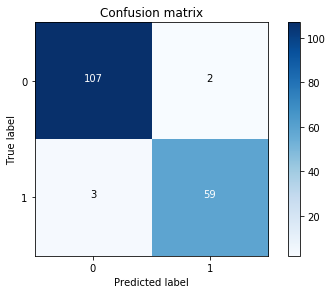

In [43]:
dat = confusion_matrix(ytest, predictions)

plot_confusion_matrix(
    dat, classes=[0,1], title='Confusion matrix')
plt.show()

parfit result > hyperopt result

### CatBoost

In [22]:
# https://github.com/catboost/catboost/blob/master/catboost/tutorials/catboost_python_tutorial.ipynb

In [46]:
from catboost import CatBoostClassifier, Pool, cv

In [47]:
model = CatBoostClassifier(
    iterations=2,
    depth=2,
    learning_rate=1,
    loss_function='Logloss',
    logging_level='Verbose')

In [48]:
model = CatBoostClassifier(
    custom_loss=['Accuracy'], random_seed=42, logging_level='Silent')

# this function handles all the different data types in a data set so no need to process numerical, strings, etc etc which is rather nice!
categorical_features_indices = np.where(x_data.dtypes != np.float)[0]

In [49]:
model.fit(
    xtrain,
    ytrain,
    cat_features=categorical_features_indices,
    eval_set=(xtest, ytest),
    #logging_level='Verbose',  #uncomment this for text output
    plot=True)

Learning rate set to 0.070834


MetricVisualizer(data={'catboost_info': {'path': 'catboost_info', 'name': 'catboost_info', 'content': {'passed…

#### Cross validation

In [50]:
# 10-fold cross validation
cv_data = cv(
    Pool(xtrain, ytrain, cat_features=categorical_features_indices),
    model.get_params(),
    plot=True)

Learning rate set to 0.011493


MetricVisualizer(data={'catboost_info': {'path': 'catboost_info', 'name': 'catboost_info', 'content': {'passed…

In [51]:
print('Best validation accuracy score: {:.2f}±{:.2f} on step {}'.format(
    np.max(cv_data['test-Accuracy-mean']),
    cv_data['test-Accuracy-std'][np.argmax(cv_data['test-Accuracy-mean'])],
    np.argmax(cv_data['test-Accuracy-mean'])
))


Best validation accuracy score: 0.96±0.00 on step 962


/home/ssc17-rxd10/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


In [52]:
print('Precise validation accuracy score: {}'.format(np.max(cv_data['test-Accuracy-mean'])))

Precise validation accuracy score: 0.9648363332573858


#### Parameter tuning

In [54]:
import hyperopt

def hyperopt_objective(params):
    model = CatBoostClassifier(
        l2_leaf_reg=int(params['l2_leaf_reg']),
        learning_rate=params['learning_rate'],
        iterations=500,
        eval_metric='Accuracy',
        random_seed=8418,
        logging_level='Silent'
    )
    
    cv_data = cv(
        Pool(xtrain, ytrain, cat_features=categorical_features_indices),
        model.get_params()
    )
    best_accuracy = np.max(cv_data['test-Accuracy-mean'])
    
    return 1 - best_accuracy # as hyperopt minimises

In [55]:
params_space = {
    'l2_leaf_reg': hyperopt.hp.qloguniform('l2_leaf_reg', 0, 2, 1),
    'learning_rate': hyperopt.hp.uniform('learning_rate', 1e-3, 5e-1),
}

trials = hyperopt.Trials()

best = hyperopt.fmin(
    hyperopt_objective,
    space=params_space,
    algo=hyperopt.tpe.suggest,
    max_evals=100,
    trials=trials
)

print(best)

{'l2_leaf_reg': 5.0, 'learning_rate': 0.11904377155591452}


In [56]:
model = CatBoostClassifier(
    l2_leaf_reg=int(best['l2_leaf_reg']),
    learning_rate=best['learning_rate'],
    iterations=500,
    eval_metric='Accuracy',
    random_seed=42,
    logging_level='Silent'
)
cv_data = cv(Pool(xtrain, ytrain, cat_features=categorical_features_indices), model.get_params())


In [57]:
print('Precise validation accuracy score: {}'.format(np.max(cv_data['test-Accuracy-mean'])))

Precise validation accuracy score: 0.9648363332573858
